In [102]:

from datetime import datetime as dt


import numpy as np
import matplotlib.pyplot as plt


import pandas as pd
import ctypes
import struct

### Data Ingestion

In [109]:
with open(r"C:\Users\jules\OneDrive\F1 2021 Telemetry\Wireshark Data\0 - Motion.txt", 'r') as f:
    data = f.readlines()
    f.close()
    
with open(r"C:\Users\jules\OneDrive\F1 2021 Telemetry\Wireshark Data\0 - Motion.txt", 'rb') as f:
    data_rb = f.readlines()
    f.close()
    

bin = []
data_b = []

# for line in data:
#     bin.append(line.decode())
    
for line_b in data_rb:
    bin.append(line_b.decode())
    

for line_b in bin:
    data_b.append(bytes.fromhex(line_b))

In [111]:
data_b[0]

b'\xe5\x07\x01\x12\x01\x00\xbbw\xdf\xf7\x07y\xb0\x0b_\xffL<\x00\x00\x00\x00\x00\xff\xfb \xb0\xc3D\xf4\xb6BO\xba\x05B\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00-\x80\xff\xfe\x81\xf9\x7f\x06\x1c\x00,\x80\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf1\x8f\xcf\xbf\x00\x89\x01\xbc\x87\xc7c\xba\x85?\xbc\xc3s\xaa\xb6Bz\xdb\xc3\xc2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\r\x07\x1b\x003\x80\xc9\x7f\xee\x01\r\x07\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xab\x88E@\x00\xa3w\xbc\x87?w\xbc\x83\x00\xbf\xc3\xdf\x81\xb6B\xd0\xf2\xb3\xc2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00H\x05\xfc\xff\x1d\x80\xdf\x7f\xf9\x01H\x05\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x10kF@\x00\xa0|\xbc\x03\xf0|\xbc\xed\x97\xbc\xc3a\xae\xb6By\xf0\xa3\xc2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf4\x05\xe9\xff%\x80\xd7\x7f\r\x02\xf4\x05\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00#\x15F@\xc0\xe8\x82\xbcJT\x83\xbc\x88Y\xbf\xc3\xa1\x85\xb6B~7\x94\xc2\x00\x00\x00\x00\x00\x00\x00\x00

In [112]:
dict_packet = {
     0   : "Motion" 
    ,1   : "Session" 
    ,2   : "Lap Data"
    ,3   : "Event" 
    ,4   : "Participants" 
    ,5   : "Car Setups"
    ,6   : "Car Telemetry"
    ,7   : "Car Status"
    ,8   : "Final Classification"
    ,9   : "Lobby Info"
    ,10  : "Car Damage"
    ,11  : "Session History"
}

# F1 2021 UDP Specificaion

### Packet Header

In [113]:
class PacketHeader(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_packet_format',              ctypes.c_uint16), # 2021
        ('m_game_major_version',         ctypes.c_uint8),  # Game major version - "X.00"
        ('m_game_minor_version',         ctypes.c_uint8),  # Game minor version - "1.XX"
        ('m_packet_version',             ctypes.c_uint8),  # Version of this packet type, all start from 1
        ('m_packet_id',                  ctypes.c_uint8),  # Identifier for the packet type, see below
        ('m_session_uid',                ctypes.c_uint64), # Unique identifier for the session
        ('m_session_time',               ctypes.c_float),  # Session timestamp
        ('m_frame_identifier',           ctypes.c_uint32), # Identifier for the frame the data was retrieved on
        ('m_player_car_index',           ctypes.c_uint8),  # Index of player's car in the array
        ('m_secondary_player_car_index', ctypes.c_uint8),  # Index of secondary player's car in the array (splitscreen)
        # 255 if no second player
    ]


In [114]:
# SWAP ENDIANESS
def swap_endianess(hexstring):
	ba = bytearray.fromhex(hexstring)
	ba.reverse()
	return ba.hex()

int('00', 16) 

0

In [115]:
print(data[0][0:4])
print(data[0][4:6])
print(data[0][6:8])
print(data[0][8:10])
print(data[0][10:12])
print(data[0][12:28])
print(data[0][28:36])
print(data[0][36:44])
print(data[0][44:46])
print(data[0][46:48])

e507
01
12
01
00
bb77dff70779b00b
5fff4c3c
00000000
00
ff


In [116]:
for i in range(len(data)):

    m_packet_format =              int(swap_endianess(data[0][0:4]),   base=16)
    m_game_major_version =         int(swap_endianess(data[0][4:6]),   base=16)
    m_game_minor_version =         int(swap_endianess(data[0][6:8]),   base=16)
    m_packet_version =             int(swap_endianess(data[0][8:10]),  base=16)
    m_packet_id =                  int(swap_endianess(data[0][10:12]), base=16)
    m_session_uid =                int(swap_endianess(data[0][12:28]), base=16)
    m_session_time =               struct.unpack('!f', bytes.fromhex(swap_endianess(data[0][28:36])))[0] #[0]float(swap_endianess(data[0][28:36]))
    m_frame_identifier =           int(swap_endianess(data[0][36:44]), base=16)
    m_player_car_index =           int(swap_endianess(data[0][44:46]), base=16)
    m_secondary_player_car_index = int(swap_endianess(data[0][46:48]), base=16)

print("m_packet_format: ", m_packet_format)
print("m_game_major_version: ", m_game_major_version)
print("m_game_minor_version: ", m_game_minor_version)
print("m_packet_version: ", m_packet_version)
print("m_packet_id: ", m_packet_id)
print("m_session_uid: ", m_session_uid)
print("m_session_time: ", m_session_time)
print("m_frame_identifier: ", m_frame_identifier)
print("m_player_car_index: ", m_player_car_index)
print("m_secondary_player_car_index: ", m_secondary_player_car_index)

m_packet_format:  2021
m_game_major_version:  1
m_game_minor_version:  18
m_packet_version:  1
m_packet_id:  0
m_session_uid:  842306205448632251
m_session_time:  0.012512057088315487
m_frame_identifier:  0
m_player_car_index:  0
m_secondary_player_car_index:  255


In [117]:
#  HEADER LOOP - THIS WORKS

df_header = pd.DataFrame()

ls_m_packet_format = []
ls_m_game_major_version = []
ls_m_game_minor_version = []
ls_m_packet_version = []
ls_m_packet_id = []
ls_m_session_uid = []
ls_m_session_time = []
ls_m_frame_identifier = []
ls_m_player_car_index = []
ls_m_secondary_player_car_index = []

for i in range(0, len(data)):
    # HEADER


    m_packet_format =              int(swap_endianess(data[i][0:4]),   base=16)
    m_game_major_version =         int(swap_endianess(data[i][4:6]),   base=16)
    m_game_minor_version =         int(swap_endianess(data[i][6:8]),   base=16)
    m_packet_version =             int(swap_endianess(data[i][8:10]),  base=16)
    m_packet_id =                  int(swap_endianess(data[i][10:12]), base=16)
    m_session_uid =                int(swap_endianess(data[i][12:28]), base=16)
    m_session_time =               struct.unpack('!f', bytes.fromhex(swap_endianess(data[i][28:36])))[0] 
    m_frame_identifier =           int(swap_endianess(data[i][36:44]), base=16)
    m_player_car_index =           int(swap_endianess(data[i][44:46]), base=16)
    m_secondary_player_car_index = int(swap_endianess(data[i][46:48]), base=16)
    
    ls_m_packet_format.append(m_packet_format)
    ls_m_game_major_version.append(m_game_major_version)
    ls_m_game_minor_version.append(m_game_minor_version)
    ls_m_packet_version.append(m_packet_version)
    ls_m_packet_id.append(m_packet_id)
    ls_m_session_uid.append(m_session_uid)
    ls_m_session_time.append(m_session_time)
    ls_m_frame_identifier.append(m_frame_identifier)
    ls_m_player_car_index.append(m_player_car_index)
    ls_m_secondary_player_car_index.append(m_secondary_player_car_index)
    
df_header['m_packet_format'] = ls_m_packet_format
df_header['m_game_major_version'] = ls_m_game_major_version
df_header['m_game_minor_version'] = ls_m_game_minor_version
df_header['m_packet_version'] = ls_m_packet_version
df_header['m_packet_id'] = ls_m_packet_id
df_header['m_session_uid'] = ls_m_session_uid
df_header['m_session_time'] = ls_m_session_time
df_header['m_frame_identifier'] = ls_m_frame_identifier
df_header['m_player_car_index'] = ls_m_player_car_index
df_header['m_secondary_player_car_index'] = ls_m_secondary_player_car_index

df_header
# df_header.to_csv('0 header.csv')

# df_header = df_header[df_header['m_packet_format'] == 2021]
# df_lap_packets = df_header[df_header['m_packet_id'] == 2]

# df_header = df_header[df_header['m_packet_id'] == 0]

df_header.to_csv(rf'C:\Users\jules\OneDrive\F1 2021 Telemetry\Packet Data CSVs\{0} - {dict_packet[0]} - Header.csv')


### 0 - Motion
Packet Size: 1464

In [118]:
# ===========================================================   PACKET ID 0: MOTION   ============================================================
class CarMotionData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_world_position_x', ctypes.c_float), # World space X position
        ('m_world_position_y', ctypes.c_float), # World space Y position
        ('m_world_position_z', ctypes.c_float), # World space Z position
        ('m_world_velocity_x', ctypes.c_float), # Velocity in world space X
        ('m_world_velocity_y', ctypes.c_float), # Velocity in world space Y
        ('m_world_velocity_z', ctypes.c_float), # Velocity in world space Z
        ('m_world_forward_dir_x', ctypes.c_int16), # World space forward X direction (normalised)
        ('m_world_forward_dir_y', ctypes.c_int16), # World space forward Y direction (normalised)
        ('m_world_forward_dir_z', ctypes.c_int16), # World space forward Z direction (normalised)
        ('m_world_right_dir_x', ctypes.c_int16), # World space right X direction (normalised)
        ('m_world_right_dir_y', ctypes.c_int16), # World space right Y direction (normalised)
        ('m_world_right_dir_z', ctypes.c_int16), # World space right Z direction (normalised)
        ('m_g_force_lateral', ctypes.c_float), # Lateral G-Force component
        ('m_g_force_longitudinal', ctypes.c_float), # Longitudinal G-Force component
        ('m_g_force_vertical', ctypes.c_float), # Vertical G-Force component
        ('m_yaw', ctypes.c_float), # Yaw angle in radians
        ('m_pitch', ctypes.c_float), # Pitch angle in radians
        ('m_roll', ctypes.c_float), # Roll angle in radians
    ]

class PacketMotionData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_header', PacketHeader), # Header
        ('m_car_motion_data', CarMotionData * 22), # Data for all cars on track        # Extra player car ONLY data
        ('m_suspension_position', ctypes.c_float * 4), # Note: All wheel arrays have the following order:
        ('m_suspension_velocity', ctypes.c_float * 4), # RL, RR, FL, FR
        ('m_suspension_acceleration', ctypes.c_float * 4), # RL, RR, FL, FR
        ('m_wheel_speed', ctypes.c_float * 4), # Speed of each wheel
        ('m_wheel_slip', ctypes.c_float * 4), # Slip ratio for each wheel
        ('m_local_velocity_x', ctypes.c_float), # Velocity in local space
        ('m_local_velocity_y', ctypes.c_float), # Velocity in local space
        ('m_local_velocity_z', ctypes.c_float), # Velocity in local space
        ('m_angular_velocity_x', ctypes.c_float), # Angular velocity x-component
        ('m_angular_velocity_y', ctypes.c_float), # Angular velocity y-component
        ('m_angular_velocity_z', ctypes.c_float), # Angular velocity z-component
        ('m_angular_acceleration_x', ctypes.c_float), # Angular velocity x-component
        ('m_angular_acceleration_y', ctypes.c_float), # Angular velocity y-component
        ('m_angular_acceleration_z', ctypes.c_float), # Angular velocity z-component
        ('m_front_wheels_angle', ctypes.c_float), # Current front wheels angle in radians
    ]


In [119]:
struct.unpack('i', bytes.fromhex(data[0][104:112]))[0]

# int(swap_endianess(data[0][104:112]), base=16)
# struct.unpack('!f', bytes.fromhex(''))[0]


109050241

In [120]:
# CAR MOTION



# m_motion = CarMotionData.from_buffer_copy(d[24:])
m_world_position_x     = struct.unpack('f', bytes.fromhex(data[169][48:56]))[0] 
m_world_position_y     = struct.unpack('f', bytes.fromhex(data[169][56:64]))[0] 
m_world_position_z     = struct.unpack('f', bytes.fromhex(data[169][64:72]))[0] 
m_world_velocity_x     = struct.unpack('f', bytes.fromhex(data[169][72:80]))[0] 
m_world_velocity_y     = struct.unpack('f', bytes.fromhex(data[169][88:96]))[0] 
m_world_velocity_z     = struct.unpack('f', bytes.fromhex(data[169][96:104]))[0] 
m_world_forward_dir_x  =               int(swap_endianess(data[169][104:108]),   base=16)
m_world_forward_dir_y  =               int(swap_endianess(data[169][108:112]),   base=16)
m_world_forward_dir_z  =               int(swap_endianess(data[169][112:116]),   base=16)
m_world_right_dir_x    =               int(swap_endianess(data[169][116:120]),   base=16)
m_world_right_dir_y    =               int(swap_endianess(data[169][120:124]),   base=16)
m_world_right_dir_z    =               int(swap_endianess(data[169][124:128]),   base=16)
m_g_force_lateral      = struct.unpack('f', bytes.fromhex(data[169][128:136]))[0] 
m_g_force_longitudinal = struct.unpack('f', bytes.fromhex(data[169][136:144]))[0] 
m_g_force_vertical     = struct.unpack('f', bytes.fromhex(data[169][144:152]))[0] 
m_yaw                  = struct.unpack('f', bytes.fromhex(data[169][152:160]))[0] 
m_pitch                = struct.unpack('f', bytes.fromhex(data[169][160:168]))[0] 
m_roll                 = struct.unpack('f', bytes.fromhex(data[169][176:184]))[0] 

print('m_world_position_x: ', m_world_position_x)
print('m_world_position_y: ', m_world_position_y)
print('m_world_position_z: ', m_world_position_z)
print('m_world_velocity_x: ', m_world_velocity_x)
print('m_world_velocity_y: ', m_world_velocity_y)
print('m_world_velocity_z: ', m_world_velocity_z)
print('m_world_forward_dir_x: ', m_world_forward_dir_x)
print('m_world_forward_dir_y: ', m_world_forward_dir_y)
print('m_world_forward_dir_z: ', m_world_forward_dir_z)
print('m_world_right_dir_x: ', m_world_right_dir_x)
print('m_world_right_dir_y: ', m_world_right_dir_y)
print('m_world_right_dir_z: ', m_world_right_dir_z)
print('m_g_force_lateral: ', m_g_force_lateral)
print('m_g_force_longitudinal: ', m_g_force_longitudinal)
print('m_g_force_vertical: ', m_g_force_vertical)
print('m_yaw: ', m_yaw)
print('m_pitch: ', m_pitch)
print('m_roll: ', m_roll)


m_world_position_x:  222.62435913085938
m_world_position_y:  103.36793518066406
m_world_position_z:  283.6931457519531
m_world_velocity_x:  -54.593502044677734
m_world_velocity_y:  30.003190994262695
m_world_velocity_z:  -1.2598537377404416e+38
m_world_forward_dir_x:  15765
m_world_forward_dir_y:  49791
m_world_forward_dir_z:  64333
m_world_right_dir_x:  36826
m_world_right_dir_y:  44346
m_world_right_dir_z:  15707
m_g_force_lateral:  0.870535135269165
m_g_force_longitudinal:  0.15440812706947327
m_g_force_vertical:  -1.0693610906600952
m_yaw:  -0.026336193084716797
m_pitch:  0.036750972270965576
m_roll:  91.3329086303711


In [121]:
# data

In [122]:
# CAR MOTION LOOP - CTYPES

df_car_motion_data = pd.DataFrame()

ls_m_world_position_x = []
ls_m_world_position_y = []
ls_m_world_position_z = []
ls_m_world_velocity_x = []
ls_m_world_velocity_y = []
ls_m_world_velocity_z = []
ls_m_world_forward_dir_x = []
ls_m_world_forward_dir_y = []
ls_m_world_forward_dir_z = []
ls_m_world_right_dir_x = []
ls_m_world_right_dir_y = []
ls_m_world_right_dir_z = []
ls_m_g_force_lateral = []
ls_m_g_force_longitudinal = []
ls_m_g_force_vertical = []
ls_m_yaw = []
ls_m_pitch = []
ls_m_roll = []

for i in range(len(data)):
    
    d = data_b[i]
    

    m_motion = CarMotionData.from_buffer_copy(d[24:])
    
    m_world_position_x = m_motion.m_world_position_x
    m_world_position_y = m_motion.m_world_position_y
    m_world_position_z = m_motion.m_world_position_z
    m_world_velocity_x = m_motion.m_world_velocity_x
    m_world_velocity_y = m_motion.m_world_velocity_y
    m_world_velocity_z = m_motion.m_world_velocity_z
    m_world_forward_dir_x = m_motion.m_world_forward_dir_x
    m_world_forward_dir_y = m_motion.m_world_forward_dir_y
    m_world_forward_dir_z = m_motion.m_world_forward_dir_z
    m_world_right_dir_x = m_motion.m_world_right_dir_x
    m_world_right_dir_y = m_motion.m_world_right_dir_y
    m_world_right_dir_z = m_motion.m_world_right_dir_z
    m_g_force_lateral = m_motion.m_g_force_lateral
    m_g_force_longitudinal = m_motion.m_g_force_longitudinal
    m_g_force_vertical = m_motion.m_g_force_vertical
    m_yaw = m_motion.m_yaw
    m_pitch = m_motion.m_pitch
    m_roll = m_motion.m_roll
    
    ls_m_world_position_x.append(m_world_position_x)
    ls_m_world_position_y.append(m_world_position_y)
    ls_m_world_position_z.append(m_world_position_z)
    ls_m_world_velocity_x.append(m_world_velocity_x)
    ls_m_world_velocity_y.append(m_world_velocity_y)
    ls_m_world_velocity_z.append(m_world_velocity_z)
    ls_m_world_forward_dir_x.append(m_world_forward_dir_x)
    ls_m_world_forward_dir_y.append(m_world_forward_dir_y)
    ls_m_world_forward_dir_z.append(m_world_forward_dir_z)
    ls_m_world_right_dir_x.append(m_world_right_dir_x)
    ls_m_world_right_dir_y.append(m_world_right_dir_y)
    ls_m_world_right_dir_z.append(m_world_right_dir_z)
    ls_m_g_force_lateral.append(m_g_force_lateral)
    ls_m_g_force_longitudinal.append(m_g_force_longitudinal)
    ls_m_g_force_vertical.append(m_g_force_vertical)
    ls_m_yaw.append(m_yaw)
    ls_m_pitch.append(m_pitch)
    ls_m_roll.append(m_roll)
    

df_car_motion_data['m_world_position_x'] = ls_m_world_position_x
df_car_motion_data['m_world_position_y'] = ls_m_world_position_y
df_car_motion_data['m_world_position_z'] = ls_m_world_position_z
df_car_motion_data['m_world_velocity_x'] = ls_m_world_velocity_x
df_car_motion_data['m_world_velocity_y'] = ls_m_world_velocity_y
df_car_motion_data['m_world_velocity_z'] = ls_m_world_velocity_z
df_car_motion_data['m_world_forward_dir_x'] = ls_m_world_forward_dir_x
df_car_motion_data['m_world_forward_dir_y'] = ls_m_world_forward_dir_y
df_car_motion_data['m_world_forward_dir_z'] = ls_m_world_forward_dir_z
df_car_motion_data['m_world_right_dir_x'] = ls_m_world_right_dir_x
df_car_motion_data['m_world_right_dir_y'] = ls_m_world_right_dir_y
df_car_motion_data['m_world_right_dir_z'] = ls_m_world_right_dir_z
df_car_motion_data['m_g_force_lateral'] = ls_m_g_force_lateral
df_car_motion_data['m_g_force_longitudinal'] = ls_m_g_force_longitudinal
df_car_motion_data['m_g_force_vertical'] = ls_m_g_force_vertical
df_car_motion_data['m_yaw'] = ls_m_yaw
df_car_motion_data['m_pitch'] = ls_m_pitch
df_car_motion_data['m_roll'] = ls_m_roll

df_car_motion_data.to_csv(fr'C:\Users\jules\OneDrive\F1 2021 Telemetry\Packet Data CSVs\{0} - {dict_packet[0]} - CTYPES.csv')



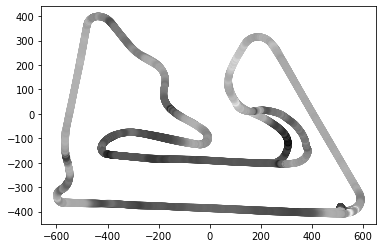

In [140]:
# Plot...
plt.scatter(x=df_car_motion_data['m_world_position_z'].iloc[170:], 
            y=df_car_motion_data['m_world_position_x'].iloc[170:],
            c=df_car_motion_data['m_roll'].iloc[170:]) # s is a size of marker 


plt.show()

In [120]:
# CAR MOTION LOOP - PYTHON TYPES

df_car_motion_data = pd.DataFrame()

ls_m_world_position_x = []
ls_m_world_position_y = []
ls_m_world_position_z = []
ls_m_world_velocity_x = []
ls_m_world_velocity_y = []
ls_m_world_velocity_z = []
ls_m_world_forward_dir_x = []
ls_m_world_forward_dir_y = []
ls_m_world_forward_dir_z = []
ls_m_world_right_dir_x = []
ls_m_world_right_dir_y = []
ls_m_world_right_dir_z = []
ls_m_g_force_lateral = []
ls_m_g_force_longitudinal = []
ls_m_g_force_vertical = []
ls_m_yaw = []
ls_m_pitch = []
ls_m_roll = []

for i in range(len(data)):
    
    # d = data[i]
    

    # m_motion = CarMotionData.from_buffer_copy(d[24:])
    
    m_world_position_x     = struct.unpack('f', bytes.fromhex(data[i][48:56]))[0] 
    m_world_position_y     = struct.unpack('f', bytes.fromhex(data[i][56:64]))[0] 
    m_world_position_z     = struct.unpack('f', bytes.fromhex(data[i][64:72]))[0] 
    m_world_velocity_x     = struct.unpack('f', bytes.fromhex(data[i][72:80]))[0] 
    m_world_velocity_y     = struct.unpack('f', bytes.fromhex(data[i][88:96]))[0] 
    m_world_velocity_z     = struct.unpack('f', bytes.fromhex(data[i][96:104]))[0] 
    m_world_forward_dir_x  =               int(swap_endianess(data[i][104:108]),   base=16)
    m_world_forward_dir_y  =               int(swap_endianess(data[i][108:112]),   base=16)
    m_world_forward_dir_z  =               int(swap_endianess(data[i][112:116]),   base=16)
    m_world_right_dir_x    =               int(swap_endianess(data[i][116:120]),   base=16)
    m_world_right_dir_y    =               int(swap_endianess(data[i][120:124]),   base=16)
    m_world_right_dir_z    =               int(swap_endianess(data[i][124:128]),   base=16)
    m_g_force_lateral      = struct.unpack('f', bytes.fromhex(data[i][128:136]))[0] 
    m_g_force_longitudinal = struct.unpack('f', bytes.fromhex(data[i][136:144]))[0] 
    m_g_force_vertical     = struct.unpack('f', bytes.fromhex(data[i][144:152]))[0] 
    m_yaw                  = struct.unpack('f', bytes.fromhex(data[i][152:160]))[0] 
    m_pitch                = struct.unpack('f', bytes.fromhex(data[i][160:168]))[0] 
    m_roll                 = struct.unpack('f', bytes.fromhex(data[i][168:176]))[0] 
        
    ls_m_world_position_x.append(m_world_position_x)
    ls_m_world_position_y.append(m_world_position_y)
    ls_m_world_position_z.append(m_world_position_z)
    ls_m_world_velocity_x.append(m_world_velocity_x)
    ls_m_world_velocity_y.append(m_world_velocity_y)
    ls_m_world_velocity_z.append(m_world_velocity_z)
    ls_m_world_forward_dir_x.append(m_world_forward_dir_x)
    ls_m_world_forward_dir_y.append(m_world_forward_dir_y)
    ls_m_world_forward_dir_z.append(m_world_forward_dir_z)
    ls_m_world_right_dir_x.append(m_world_right_dir_x)
    ls_m_world_right_dir_y.append(m_world_right_dir_y)
    ls_m_world_right_dir_z.append(m_world_right_dir_z)
    ls_m_g_force_lateral.append(m_g_force_lateral)
    ls_m_g_force_longitudinal.append(m_g_force_longitudinal)
    ls_m_g_force_vertical.append(m_g_force_vertical)
    ls_m_yaw.append(m_yaw)
    ls_m_pitch.append(m_pitch)
    ls_m_roll.append(m_roll)
    

df_car_motion_data['m_world_position_x'] = ls_m_world_position_x
df_car_motion_data['m_world_position_y'] = ls_m_world_position_y
df_car_motion_data['m_world_position_z'] = ls_m_world_position_z
df_car_motion_data['m_world_velocity_x'] = ls_m_world_velocity_x
df_car_motion_data['m_world_velocity_y'] = ls_m_world_velocity_y
df_car_motion_data['m_world_velocity_z'] = ls_m_world_velocity_z
df_car_motion_data['m_world_forward_dir_x'] = ls_m_world_forward_dir_x
df_car_motion_data['m_world_forward_dir_y'] = ls_m_world_forward_dir_y
df_car_motion_data['m_world_forward_dir_z'] = ls_m_world_forward_dir_z
df_car_motion_data['m_world_right_dir_x'] = ls_m_world_right_dir_x
df_car_motion_data['m_world_right_dir_y'] = ls_m_world_right_dir_y
df_car_motion_data['m_world_right_dir_z'] = ls_m_world_right_dir_z
df_car_motion_data['m_g_force_lateral'] = ls_m_g_force_lateral
df_car_motion_data['m_g_force_longitudinal'] = ls_m_g_force_longitudinal
df_car_motion_data['m_g_force_vertical'] = ls_m_g_force_vertical
df_car_motion_data['m_yaw'] = ls_m_yaw
df_car_motion_data['m_pitch'] = ls_m_pitch
df_car_motion_data['m_roll'] = ls_m_roll

df_car_motion_data.to_csv(fr'C:\Users\jules\OneDrive\F1 2021 Telemetry\Packet Data CSVs\{0} - {dict_packet[0]}.csv')



### 1 - Session
Packet Size: 625

In [ ]:
# ===========================================================   PACKET ID 1: SESSION  ============================================================
class MarshalZone(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_zone_start', ctypes.c_float), # Fraction (0..1) of way through the lap the marshal zone starts
        ('m_zone_flag', ctypes.c_int8), # -1 = invalid/unknown, 0 = none, 1 = green, 2 = blue, 3 = yellow, 4 = red
    ]

class WeatherForecastSample(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_session_type', ctypes.c_uint8), # 0 = unknown, 1 = P1, 2 = P2, 3 = P3, 4 = Short P, 5 = Q1        # 6 = Q2, 7 = Q3, 8 = Short Q, 9 = OSQ, 10 = R, 11 = R2        # 12 = Time Trial
        ('m_time_offset', ctypes.c_uint8), # Time in minutes the forecast is for
        ('m_weather', ctypes.c_uint8), # Weather - 0 = clear, 1 = light cloud, 2 = overcast        # 3 = light rain, 4 = heavy rain, 5 = storm
        ('m_track_temperature', ctypes.c_int8), # Track temp. in degrees Celsius
        ('m_track_temperature_change', ctypes.c_int8), # Track temp. change – 0 = up, 1 = down, 2 = no change
        ('m_air_temperature', ctypes.c_int8), # Air temp. in degrees celsius
        ('m_air_temperature_change', ctypes.c_int8), # Air temp. change – 0 = up, 1 = down, 2 = no change
        ('m_rain_percentage', ctypes.c_uint8), # Rain percentage (0-100)
    ]


class PacketSessionData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_header', PacketHeader), # Header
        ('m_weather', ctypes.c_uint8), # Weather - 0 = clear, 1 = light cloud, 2 = overcast        # 3 = light rain, 4 = heavy rain, 5 = storm
        ('m_track_temperature', ctypes.c_int8), # Track temp. in degrees celsius
        ('m_air_temperature', ctypes.c_int8), # Air temp. in degrees celsius
        ('m_total_laps', ctypes.c_uint8), # Total number of laps in this race
        ('m_track_length', ctypes.c_uint16), # Track length in metres
        ('m_session_type', ctypes.c_uint8), # 0 = unknown, 1 = P1, 2 = P2, 3 = P3, 4 = Short P        # 5 = Q1, 6 = Q2, 7 = Q3, 8 = Short Q, 9 = OSQ        # 10 = R, 11 = R2, 12 = R3, 13 = Time Trial
        ('m_track_id', ctypes.c_int8), # -1 for unknown, 0-21 for tracks, see appendix
        ('m_formula', ctypes.c_uint8), # Formula, 0 = F1 Modern, 1 = F1 Classic, 2 = F2,        # 3 = F1 Generic
        ('m_session_time_left', ctypes.c_uint16), # Time left in session in seconds
        ('m_session_duration', ctypes.c_uint16), # Session duration in seconds
        ('m_pit_speed_limit', ctypes.c_uint8), # Pit speed limit in kilometres per hour
        ('m_game_paused', ctypes.c_uint8), # Whether the game is paused
        ('m_is_spectating', ctypes.c_uint8), # Whether the player is spectating
        ('m_spectator_car_index', ctypes.c_uint8), # Index of the car being spectated
        ('m_sli_pro_native_support', ctypes.c_uint8), # SLI Pro support, 0 = inactive, 1 = active
        ('m_num_marshal_zones', ctypes.c_uint8), # Number of marshal zones to follow
        ('m_marshal_zones', MarshalZone * 21), # List of marshal zones – max 21
        ('m_safety_car_status', ctypes.c_uint8), # 0 = no safety car, 1 = full        # 2 = virtual, 3 = formation lap
        ('m_network_game', ctypes.c_uint8), # 0 = offline, 1 = online
        ('m_num_weather_forecast_samples', ctypes.c_uint8), # Number of weather samples to follow
        ('m_weather_forecast_samples', WeatherForecastSample * 56), # Array of weather forecast samples
        ('m_forecast_accuracy', ctypes.c_uint8), # 0 = Perfect, 1 = Approximate
        ('m_ai_difficulty', ctypes.c_uint8), # AI Difficulty rating – 0-110
        ('m_season_link_identifier', ctypes.c_uint32), # Identifier for season - persists across saves
        ('m_weekend_link_identifier', ctypes.c_uint32), # Identifier for weekend - persists across saves
        ('m_session_link_identifier', ctypes.c_uint32), # Identifier for session - persists across saves
        ('m_pit_stop_window_ideal_lap', ctypes.c_uint8), # Ideal lap to pit on for current strategy (player)
        ('m_pit_stop_window_latest_lap', ctypes.c_uint8), # Latest lap to pit on for current strategy (player)
        ('m_pit_stop_rejoin_position', ctypes.c_uint8), # Predicted position to rejoin at (player)
        ('m_steering_assist', ctypes.c_uint8), # 0 = off, 1 = on
        ('m_braking_assist', ctypes.c_uint8), # 0 = off, 1 = low, 2 = medium, 3 = high
        ('m_gearbox_assist', ctypes.c_uint8), # 1 = manual, 2 = manual & suggested gear, 3 = auto
        ('m_pit_assist', ctypes.c_uint8), # 0 = off, 1 = on
        ('m_pit_release_assist', ctypes.c_uint8), # 0 = off, 1 = on
        ('m_ersassist', ctypes.c_uint8), # 0 = off, 1 = on
        ('m_drsassist', ctypes.c_uint8), # 0 = off, 1 = on
        ('m_dynamic_racing_line', ctypes.c_uint8), # 0 = off, 1 = corners only, 2 = full
        ('m_dynamic_racing_line_type', ctypes.c_uint8), # 0 = 2D, 1 = 3D
    ]


In [33]:
# SESSION LOOP
for k in set(df_header['m_packet_id']):
    try:
        
        df_session = df_header[df_header['m_packet_id'] == k]

        ls_m_header = []
        ls_m_weather = []
        ls_m_track_temperature = []
        ls_m_air_temperature = []
        ls_m_total_laps = []
        ls_m_track_length = []
        ls_m_session_type = []
        ls_m_track_id = []
        ls_m_formula = []
        ls_m_session_time_left = []
        ls_m_session_duration = []
        ls_m_pit_speed_limit = []
        ls_m_game_paused = []
        ls_m_is_spectating = []
        ls_m_spectator_car_index = []
        ls_m_sli_pro_native_support = []
        ls_m_num_marshal_zones = []
        ls_m_marshal_zones = []
        ls_m_safety_car_status = []
        ls_m_network_game = []
        ls_m_num_weather_forecast_samples = []
        ls_m_weather_forecast_samples = []
        ls_m_forecast_accuracy = []
        ls_m_ai_difficulty = []
        ls_m_season_link_identifier = []
        ls_m_weekend_link_identifier = []
        ls_m_session_link_identifier = []
        ls_m_pit_stop_window_ideal_lap = []
        ls_m_pit_stop_window_latest_lap = []
        ls_m_pit_stop_rejoin_position = []
        ls_m_steering_assist = []
        ls_m_braking_assist = []
        ls_m_gearbox_assist = []
        ls_m_pit_assist = []
        ls_m_pit_release_assist = []
        ls_m_ersassist = []
        ls_m_drsassist = []
        ls_m_dynamic_racing_line = []
        ls_m_dynamic_racing_line_type = []


        df_session_data = pd.DataFrame()

        for i in df_session.index:
            
            d = data[i]
            session_data = PacketSessionData.from_buffer_copy(d[24:])
            
            # m_header = session_data.m_header
            m_weather = session_data.m_weather
            m_track_temperature = session_data.m_track_temperature
            m_air_temperature = session_data.m_air_temperature
            m_total_laps = session_data.m_total_laps
            m_track_length = session_data.m_track_length
            m_session_type = session_data.m_session_type
            m_track_id = session_data.m_track_id
            m_formula = session_data.m_formula
            m_session_time_left = session_data.m_session_time_left
            m_session_duration = session_data.m_session_duration
            m_pit_speed_limit = session_data.m_pit_speed_limit
            m_game_paused = session_data.m_game_paused
            m_is_spectating = session_data.m_is_spectating
            m_spectator_car_index = session_data.m_spectator_car_index
            m_sli_pro_native_support = session_data.m_sli_pro_native_support
            m_num_marshal_zones = session_data.m_num_marshal_zones
            m_marshal_zones = session_data.m_marshal_zones
            m_safety_car_status = session_data.m_safety_car_status
            m_network_game = session_data.m_network_game
            m_num_weather_forecast_samples = session_data.m_num_weather_forecast_samples
            m_weather_forecast_samples = session_data.m_weather_forecast_samples
            m_forecast_accuracy = session_data.m_forecast_accuracy
            m_ai_difficulty = session_data.m_ai_difficulty
            m_season_link_identifier = session_data.m_season_link_identifier
            m_weekend_link_identifier = session_data.m_weekend_link_identifier
            m_session_link_identifier = session_data.m_session_link_identifier
            m_pit_stop_window_ideal_lap = session_data.m_pit_stop_window_ideal_lap
            m_pit_stop_window_latest_lap = session_data.m_pit_stop_window_latest_lap
            m_pit_stop_rejoin_position = session_data.m_pit_stop_rejoin_position
            m_steering_assist = session_data.m_steering_assist
            m_braking_assist = session_data.m_braking_assist
            m_gearbox_assist = session_data.m_gearbox_assist
            m_pit_assist = session_data.m_pit_assist
            m_pit_release_assist = session_data.m_pit_release_assist
            m_ersassist = session_data.m_ersassist
            m_drsassist = session_data.m_drsassist
            m_dynamic_racing_line = session_data.m_dynamic_racing_line
            m_dynamic_racing_line_type = session_data.m_dynamic_racing_line_type
            
            # ls_m_header.append(m_header)
            ls_m_weather.append(m_weather)
            ls_m_track_temperature.append(m_track_temperature)
            ls_m_air_temperature.append(m_air_temperature)
            ls_m_total_laps.append(m_total_laps)
            ls_m_track_length.append(m_track_length)
            ls_m_session_type.append(m_session_type)
            ls_m_track_id.append(m_track_id)
            ls_m_formula.append(m_formula)
            ls_m_session_time_left.append(m_session_time_left)
            ls_m_session_duration.append(m_session_duration)
            ls_m_pit_speed_limit.append(m_pit_speed_limit)
            ls_m_game_paused.append(m_game_paused)
            ls_m_is_spectating.append(m_is_spectating)
            ls_m_spectator_car_index.append(m_spectator_car_index)
            ls_m_sli_pro_native_support.append(m_sli_pro_native_support)
            ls_m_num_marshal_zones.append(m_num_marshal_zones)
            ls_m_marshal_zones.append(m_marshal_zones)
            ls_m_safety_car_status.append(m_safety_car_status)
            ls_m_network_game.append(m_network_game)
            ls_m_num_weather_forecast_samples.append(m_num_weather_forecast_samples)
            ls_m_weather_forecast_samples.append(m_weather_forecast_samples)
            ls_m_forecast_accuracy.append(m_forecast_accuracy)
            ls_m_ai_difficulty.append(m_ai_difficulty)
            ls_m_season_link_identifier.append(m_season_link_identifier)
            ls_m_weekend_link_identifier.append(m_weekend_link_identifier)
            ls_m_session_link_identifier.append(m_session_link_identifier)
            ls_m_pit_stop_window_ideal_lap.append(m_pit_stop_window_ideal_lap)
            ls_m_pit_stop_window_latest_lap.append(m_pit_stop_window_latest_lap)
            ls_m_pit_stop_rejoin_position.append(m_pit_stop_rejoin_position)
            ls_m_steering_assist.append(m_steering_assist)
            ls_m_braking_assist.append(m_braking_assist)
            ls_m_gearbox_assist.append(m_gearbox_assist)
            ls_m_pit_assist.append(m_pit_assist)
            ls_m_pit_release_assist.append(m_pit_release_assist)
            ls_m_ersassist.append(m_ersassist)
            ls_m_drsassist.append(m_drsassist)
            ls_m_dynamic_racing_line.append(m_dynamic_racing_line)
            ls_m_dynamic_racing_line_type.append(m_dynamic_racing_line_type)
            
            
        # df_session_data['m_header'] = ls_m_header
        df_session_data['m_weather'] = ls_m_weather
        df_session_data['m_track_temperature'] = ls_m_track_temperature
        df_session_data['m_air_temperature'] = ls_m_air_temperature
        df_session_data['m_total_laps'] = ls_m_total_laps
        df_session_data['m_track_length'] = ls_m_track_length
        df_session_data['m_session_type'] = ls_m_session_type
        df_session_data['m_track_id'] = ls_m_track_id
        df_session_data['m_formula'] = ls_m_formula
        df_session_data['m_session_time_left'] = ls_m_session_time_left
        df_session_data['m_session_duration'] = ls_m_session_duration
        df_session_data['m_pit_speed_limit'] = ls_m_pit_speed_limit
        df_session_data['m_game_paused'] = ls_m_game_paused
        df_session_data['m_is_spectating'] = ls_m_is_spectating
        df_session_data['m_spectator_car_index'] = ls_m_spectator_car_index
        df_session_data['m_sli_pro_native_support'] = ls_m_sli_pro_native_support
        df_session_data['m_num_marshal_zones'] = ls_m_num_marshal_zones
        df_session_data['m_marshal_zones'] = ls_m_marshal_zones
        df_session_data['m_safety_car_status'] = ls_m_safety_car_status
        df_session_data['m_network_game'] = ls_m_network_game
        df_session_data['m_num_weather_forecast_samples'] = ls_m_num_weather_forecast_samples
        df_session_data['m_weather_forecast_samples'] = ls_m_weather_forecast_samples
        df_session_data['m_forecast_accuracy'] = ls_m_forecast_accuracy
        df_session_data['m_ai_difficulty'] = ls_m_ai_difficulty
        df_session_data['m_season_link_identifier'] = ls_m_season_link_identifier
        df_session_data['m_weekend_link_identifier'] = ls_m_weekend_link_identifier
        df_session_data['m_session_link_identifier'] = ls_m_session_link_identifier
        df_session_data['m_pit_stop_window_ideal_lap'] = ls_m_pit_stop_window_ideal_lap
        df_session_data['m_pit_stop_window_latest_lap'] = ls_m_pit_stop_window_latest_lap
        df_session_data['m_pit_stop_rejoin_position'] = ls_m_pit_stop_rejoin_position
        df_session_data['m_steering_assist'] = ls_m_steering_assist
        df_session_data['m_braking_assist'] = ls_m_braking_assist
        df_session_data['m_gearbox_assist'] = ls_m_gearbox_assist
        df_session_data['m_pit_assist'] = ls_m_pit_assist
        df_session_data['m_pit_release_assist'] = ls_m_pit_release_assist
        df_session_data['m_ersassist'] = ls_m_ersassist
        df_session_data['m_drsassist'] = ls_m_drsassist
        df_session_data['m_dynamic_racing_line'] = ls_m_dynamic_racing_line
        df_session_data['m_dynamic_racing_line_type'] = ls_m_dynamic_racing_line_type
        
        df_session_data.to_csv(f'session_data {k}.csv')
        
    except Exception as e:
        print(e)

c:\Users\jules\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\dtypes\cast.py:1981: RuntimeWarning: A builtin ctypes object gave a PEP3118 format string that does not match its itemsize, so a best-guess will be made of the data type. Newer versions of python may behave correctly.
  result[:] = values


### 2 - Lap Data
Packet Size: 970

In [26]:
# ===========================================================   PACKET ID 2: LAP DATA  ============================================================
class LapData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_last_lap_time_in_ms', ctypes.c_uint32), # Last lap time in milliseconds
        ('m_current_lap_time_in_ms', ctypes.c_uint32), # Current time around the lap in milliseconds
        ('m_sector1_time_in_ms', ctypes.c_uint16), # Sector 1 time in milliseconds
        ('m_sector2_time_in_ms', ctypes.c_uint16), # Sector 2 time in milliseconds
        ('m_lap_distance', ctypes.c_float), # Distance vehicle is around current lap in metres – could        # be negative if line hasn’t been crossed yet
        ('m_total_distance', ctypes.c_float), # Total distance travelled in session in metres – could        # be negative if line hasn’t been crossed yet
        ('m_safety_car_delta', ctypes.c_float), # Delta in seconds for safety car
        ('m_car_position', ctypes.c_uint8), # Car race position
        ('m_current_lap_num', ctypes.c_uint8), # Current lap number
        ('m_pit_status', ctypes.c_uint8), # 0 = none, 1 = pitting, 2 = in pit area
        ('m_num_pit_stops', ctypes.c_uint8), # Number of pit stops taken in this race
        ('m_sector', ctypes.c_uint8), # 0 = sector1, 1 = sector2, 2 = sector3
        ('m_current_lap_invalid', ctypes.c_uint8), # Current lap invalid - 0 = valid, 1 = invalid
        ('m_penalties', ctypes.c_uint8), # Accumulated time penalties in seconds to be added
        ('m_warnings', ctypes.c_uint8), # Accumulated number of warnings issued
        ('m_num_unserved_drive_through_pens', ctypes.c_uint8), # Num drive through pens left to serve
        ('m_num_unserved_stop_go_pens', ctypes.c_uint8), # Num stop go pens left to serve
        ('m_grid_position', ctypes.c_uint8), # Grid position the vehicle started the race in
        ('m_driver_status', ctypes.c_uint8), # Status of driver - 0 = in garage, 1 = flying lap        # 2 = in lap, 3 = out lap, 4 = on track
        ('m_result_status', ctypes.c_uint8), # Result status - 0 = invalid, 1 = inactive, 2 = active        # 3 = finished, 4 = didnotfinish, 5 = disqualified        # 6 = not classified, 7 = retired
        ('m_pit_lane_timer_active', ctypes.c_uint8), # Pit lane timing, 0 = inactive, 1 = active
        ('m_pit_lane_time_in_lane_in_ms', ctypes.c_uint16), # If active, the current time spent in the pit lane in ms
        ('m_pit_stop_timer_in_ms', ctypes.c_uint16), # Time of the actual pit stop in ms
        ('m_pit_stop_should_serve_pen', ctypes.c_uint8), # Whether the car should serve a penalty at this stop
    ]

class PacketLapData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_header', PacketHeader), # Header
        ('m_lap_data', LapData * 22), # Lap data for all cars on track
    ]


In [27]:
# LAP DATA
m_lapdata = LapData.from_buffer_copy(d[24:]
                                     )
m_last_lap_time_in_ms = m_lapdata.m_last_lap_time_in_ms                                          # Last lap time in milliseconds
m_current_lap_time_in_ms = m_lapdata.m_current_lap_time_in_ms                                    # Current time around the lap in milliseconds
m_sector1_time_in_ms = m_lapdata.m_sector1_time_in_ms                                            # Sector 1 time in milliseconds
m_sector2_time_in_ms = m_lapdata.m_sector2_time_in_ms                                            # Sector 2 time in milliseconds
m_lap_distance = m_lapdata.m_lap_distance                                                        # Distance vehicle is around current lap in metres – could        # be negative if line hasn’t been crossed yet
m_total_distance = m_lapdata.m_total_distance                                                    # Total distance travelled in session in metres – could        # be negative if line hasn’t been crossed yet
m_safety_car_delta = m_lapdata.m_safety_car_delta                                                # Delta in seconds for safety car
m_car_position = m_lapdata.m_car_position                                                        # Car race position
m_current_lap_num = m_lapdata.m_current_lap_num                                                  # Current lap number
m_pit_status = m_lapdata.m_pit_status                                                            # 0 = none, 1 = pitting, 2 = in pit area
m_num_pit_stops = m_lapdata.m_num_pit_stops                                                      # Number of pit stops taken in this race
m_sector = m_lapdata.m_sector                                                                    # 0 = sector1, 1 = sector2, 2 = sector3
m_current_lap_invalid = m_lapdata.m_current_lap_invalid                                          # Current lap invalid - 0 = valid, 1 = invalid
m_penalties = m_lapdata.m_penalties                                                              # Accumulated time penalties in seconds to be added
m_warnings = m_lapdata.m_warnings                                                                # Accumulated number of warnings issued
m_num_unserved_drive_through_pens = m_lapdata.m_num_unserved_drive_through_pens                  # Num drive through pens left to serve
m_num_unserved_stop_go_pens = m_lapdata.m_num_unserved_stop_go_pens                              # Num stop go pens left to serve
m_grid_position = m_lapdata.m_grid_position                                                      # Grid position the vehicle started the race in
m_driver_status = m_lapdata.m_driver_status                                                      # Status of driver - 0 = in garage, 1 = flying lap        # 2 = in lap, 3 = out lap, 4 = on track
m_result_status = m_lapdata.m_result_status                                                      # Result status - 0 = invalid, 1 = inactive, 2 = active        # 3 = finished, 4 = didnotfinish, 5 = disqualified        # 6 = not classified, 7 = retired
m_pit_lane_timer_active = m_lapdata.m_pit_lane_timer_active                                      # Pit lane timing, 0 = inactive, 1 = active
m_pit_lane_time_in_lane_in_ms = m_lapdata.m_pit_lane_time_in_lane_in_ms                          # If active, the current time spent in the pit lane in ms
m_pit_stop_timer_in_ms = m_lapdata.m_pit_stop_timer_in_ms                                        # Time of the actual pit stop in ms
m_pit_stop_should_serve_pen = m_lapdata.m_pit_stop_should_serve_pen                              # Whether the car should serve a penalty at this stop

print('m_last_lap_time_in_ms: ', m_lapdata.m_last_lap_time_in_ms)
print('m_current_lap_time_in_ms: ', m_lapdata.m_current_lap_time_in_ms)
print('m_sector1_time_in_ms: ', m_lapdata.m_sector1_time_in_ms)
print('m_sector2_time_in_ms: ', m_lapdata.m_sector2_time_in_ms)
print('m_lap_distance: ', m_lapdata.m_lap_distance)
print('m_total_distance: ', m_lapdata.m_total_distance)
print('m_safety_car_delta: ', m_lapdata.m_safety_car_delta)
print('m_car_position: ', m_lapdata.m_car_position)
print('m_current_lap_num: ', m_lapdata.m_current_lap_num)
print('m_pit_status: ', m_lapdata.m_pit_status)
print('m_num_pit_stops: ', m_lapdata.m_num_pit_stops)
print('m_sector: ', m_lapdata.m_sector)
print('m_current_lap_invalid: ', m_lapdata.m_current_lap_invalid)
print('m_penalties: ', m_lapdata.m_penalties)
print('m_warnings: ', m_lapdata.m_warnings)
print('m_num_unserved_drive_through_pens: ', m_lapdata.m_num_unserved_drive_through_pens)
print('m_num_unserved_stop_go_pens: ', m_lapdata.m_num_unserved_stop_go_pens)
print('m_grid_position: ', m_lapdata.m_grid_position)
print('m_driver_status: ', m_lapdata.m_driver_status)
print('m_result_status: ', m_lapdata.m_result_status)
print('m_pit_lane_timer_active: ', m_lapdata.m_pit_lane_timer_active)
print('m_pit_lane_time_in_lane_in_ms: ', m_lapdata.m_pit_lane_time_in_lane_in_ms)
print('m_pit_stop_timer_in_ms: ', m_lapdata.m_pit_stop_timer_in_ms)
print('m_pit_stop_should_serve_pen: ', m_lapdata.m_pit_stop_should_serve_pen)

m_last_lap_time_in_ms:  1647325282
m_current_lap_time_in_ms:  825766453
m_sector1_time_in_ms:  12855
m_sector2_time_in_ms:  13108
m_lap_distance:  8.26507570120707e+20
m_total_distance:  6.409690556097303e-10
m_safety_car_delta:  2.7175829838501757e+23
m_car_position:  100
m_current_lap_num:  101
m_pit_status:  55
m_num_pit_stops:  53
m_sector:  99
m_current_lap_invalid:  49
m_penalties:  99
m_warnings:  51
m_num_unserved_drive_through_pens:  48
m_num_unserved_stop_go_pens:  55
m_grid_position:  55
m_driver_status:  51
m_result_status:  98
m_pit_lane_timer_active:  54
m_pit_lane_time_in_lane_in_ms:  12852
m_pit_stop_timer_in_ms:  13666
m_pit_stop_should_serve_pen:  102


In [31]:
# LAP DATA LOOP
df_lap_data = pd.DataFrame()

ls_m_last_lap_time_in_ms = []
ls_m_current_lap_time_in_ms = []
ls_m_sector1_time_in_ms = []
ls_m_sector2_time_in_ms = []
ls_m_lap_distance = []
ls_m_total_distance = []
ls_m_safety_car_delta = []
ls_m_car_position = []
ls_m_current_lap_num = []
ls_m_pit_status = []
ls_m_num_pit_stops = []
ls_m_sector = []
ls_m_current_lap_invalid = []
ls_m_penalties = []
ls_m_warnings = []
ls_m_num_unserved_drive_through_pens = []
ls_m_num_unserved_stop_go_pens = []
ls_m_grid_position = []
ls_m_driver_status = []
ls_m_result_status = []
ls_m_pit_lane_timer_active = []
ls_m_pit_lane_time_in_lane_in_ms = []
ls_m_pit_stop_timer_in_ms = []
ls_m_pit_stop_should_serve_pen = []

for i in range(len(data_b)):
        
    d = data_b[i]
    m_lapdata = LapData.from_buffer_copy(d[24:])
    
    m_last_lap_time_in_ms = m_lapdata.m_last_lap_time_in_ms                                          # Last lap time in milliseconds
    m_current_lap_time_in_ms = m_lapdata.m_current_lap_time_in_ms                                    # Current time around the lap in milliseconds
    m_sector1_time_in_ms = m_lapdata.m_sector1_time_in_ms                                            # Sector 1 time in milliseconds
    m_sector2_time_in_ms = m_lapdata.m_sector2_time_in_ms                                            # Sector 2 time in milliseconds
    m_lap_distance = m_lapdata.m_lap_distance                                                        # Distance vehicle is around current lap in metres – could        # be negative if line hasn’t been crossed yet
    m_total_distance = m_lapdata.m_total_distance                                                    # Total distance travelled in session in metres – could        # be negative if line hasn’t been crossed yet
    m_safety_car_delta = m_lapdata.m_safety_car_delta                                                # Delta in seconds for safety car
    m_car_position = m_lapdata.m_car_position                                                        # Car race position
    m_current_lap_num = m_lapdata.m_current_lap_num                                                  # Current lap number
    m_pit_status = m_lapdata.m_pit_status                                                            # 0 = none, 1 = pitting, 2 = in pit area
    m_num_pit_stops = m_lapdata.m_num_pit_stops                                                      # Number of pit stops taken in this race
    m_sector = m_lapdata.m_sector                                                                    # 0 = sector1, 1 = sector2, 2 = sector3
    m_current_lap_invalid = m_lapdata.m_current_lap_invalid                                          # Current lap invalid - 0 = valid, 1 = invalid
    m_penalties = m_lapdata.m_penalties                                                              # Accumulated time penalties in seconds to be added
    m_warnings = m_lapdata.m_warnings                                                                # Accumulated number of warnings issued
    m_num_unserved_drive_through_pens = m_lapdata.m_num_unserved_drive_through_pens                  # Num drive through pens left to serve
    m_num_unserved_stop_go_pens = m_lapdata.m_num_unserved_stop_go_pens                              # Num stop go pens left to serve
    m_grid_position = m_lapdata.m_grid_position                                                      # Grid position the vehicle started the race in
    m_driver_status = m_lapdata.m_driver_status                                                      # Status of driver - 0 = in garage, 1 = flying lap        # 2 = in lap, 3 = out lap, 4 = on track
    m_result_status = m_lapdata.m_result_status                                                      # Result status - 0 = invalid, 1 = inactive, 2 = active        # 3 = finished, 4 = didnotfinish, 5 = disqualified        # 6 = not classified, 7 = retired
    m_pit_lane_timer_active = m_lapdata.m_pit_lane_timer_active                                      # Pit lane timing, 0 = inactive, 1 = active
    m_pit_lane_time_in_lane_in_ms = m_lapdata.m_pit_lane_time_in_lane_in_ms                          # If active, the current time spent in the pit lane in ms
    m_pit_stop_timer_in_ms = m_lapdata.m_pit_stop_timer_in_ms                                        # Time of the actual pit stop in ms
    m_pit_stop_should_serve_pen = m_lapdata.m_pit_stop_should_serve_pen                              # Whether the car should serve a penalty at this stop
    
    ls_m_last_lap_time_in_ms.append(m_last_lap_time_in_ms)
    ls_m_current_lap_time_in_ms.append(m_current_lap_time_in_ms)
    ls_m_sector1_time_in_ms.append(m_sector1_time_in_ms)
    ls_m_sector2_time_in_ms.append(m_sector2_time_in_ms)
    ls_m_lap_distance.append(m_lap_distance)
    ls_m_total_distance.append(m_total_distance)
    ls_m_safety_car_delta.append(m_safety_car_delta)
    ls_m_car_position.append(m_car_position)
    ls_m_current_lap_num.append(m_current_lap_num)
    ls_m_pit_status.append(m_pit_status)
    ls_m_num_pit_stops.append(m_num_pit_stops)
    ls_m_sector.append(m_sector)
    ls_m_current_lap_invalid.append(m_current_lap_invalid)
    ls_m_penalties.append(m_penalties)
    ls_m_warnings.append(m_warnings)
    ls_m_num_unserved_drive_through_pens.append(m_num_unserved_drive_through_pens)
    ls_m_num_unserved_stop_go_pens.append(m_num_unserved_stop_go_pens)
    ls_m_grid_position.append(m_grid_position)
    ls_m_driver_status.append(m_driver_status)
    ls_m_result_status.append(m_result_status)
    ls_m_pit_lane_timer_active.append(m_pit_lane_timer_active)
    ls_m_pit_lane_time_in_lane_in_ms.append(m_pit_lane_time_in_lane_in_ms)
    ls_m_pit_stop_timer_in_ms.append(m_pit_stop_timer_in_ms)
    ls_m_pit_stop_should_serve_pen.append(m_pit_stop_should_serve_pen)
    
   
df_lap_data['m_last_lap_time_in_ms'] = ls_m_last_lap_time_in_ms
df_lap_data['m_current_lap_time_in_ms'] = ls_m_current_lap_time_in_ms
df_lap_data['m_sector1_time_in_ms'] = ls_m_sector1_time_in_ms
df_lap_data['m_sector2_time_in_ms'] = ls_m_sector2_time_in_ms
df_lap_data['m_lap_distance'] = ls_m_lap_distance
df_lap_data['m_total_distance'] = ls_m_total_distance
df_lap_data['m_safety_car_delta'] = ls_m_safety_car_delta
df_lap_data['m_car_position'] = ls_m_car_position
df_lap_data['m_current_lap_num'] = ls_m_current_lap_num
df_lap_data['m_pit_status'] = ls_m_pit_status
df_lap_data['m_num_pit_stops'] = ls_m_num_pit_stops
df_lap_data['m_sector'] = ls_m_sector
df_lap_data['m_current_lap_invalid'] = ls_m_current_lap_invalid
df_lap_data['m_penalties'] = ls_m_penalties
df_lap_data['m_warnings'] = ls_m_warnings
df_lap_data['m_num_unserved_drive_through_pens'] = ls_m_num_unserved_drive_through_pens
df_lap_data['m_num_unserved_stop_go_pens'] = ls_m_num_unserved_stop_go_pens
df_lap_data['m_grid_position'] = ls_m_grid_position
df_lap_data['m_driver_status'] = ls_m_driver_status
df_lap_data['m_result_status'] = ls_m_result_status
df_lap_data['m_pit_lane_timer_active'] = ls_m_pit_lane_timer_active
df_lap_data['m_pit_lane_time_in_lane_in_ms'] = ls_m_pit_lane_time_in_lane_in_ms
df_lap_data['m_pit_stop_timer_in_ms'] = ls_m_pit_stop_timer_in_ms
df_lap_data['m_pit_stop_should_serve_pen'] = ls_m_pit_stop_should_serve_pen

df_lap_data.to_csv(rf'C:\Users\jules\OneDrive\F1 2021 Telemetry\Packet Data CSVs\{0} - {dict_packet[0]}.csv')
    

### 3 - Event
Packet Size: 36

In [20]:
# ===========================================================   PACKET ID 3: EVENT  ============================================================
class FastestLap(ctypes.LittleEndianStructure):
    _fields_ = [
        ('vehicle_idx', ctypes.c_uint8), # Vehicle index of car achieving fastest lap
        ('lap_time', ctypes.c_float), # Lap time is in seconds
    ]

class Retirement(ctypes.LittleEndianStructure):
    _fields_ = [
        ('vehicle_idx', ctypes.c_uint8), # Vehicle index of car retiring
    ]

class TeamMateInPits(ctypes.LittleEndianStructure):
    _fields_ = [
        ('vehicle_idx', ctypes.c_uint8), # Vehicle index of team mate
    ]

class RaceWinner(ctypes.LittleEndianStructure):
    _fields_ = [
        ('vehicle_idx', ctypes.c_uint8), # Vehicle index of the race winner
    ]

class Penalty(ctypes.LittleEndianStructure):
    _fields_ = [
        ('penalty_type', ctypes.c_uint8), # Penalty type – see Appendices
        ('infringement_type', ctypes.c_uint8), # Infringement type – see Appendices
        ('vehicle_idx', ctypes.c_uint8), # Vehicle index of the car the penalty is applied to
        ('other_vehicle_idx', ctypes.c_uint8), # Vehicle index of the other car involved
        ('time', ctypes.c_uint8), # Time gained, or time spent doing action in seconds
        ('lap_num', ctypes.c_uint8), # Lap the penalty occurred on
        ('places_gained', ctypes.c_uint8), # Number of places gained by this
    ]

class SpeedTrap(ctypes.LittleEndianStructure):
    _fields_ = [
        ('vehicle_idx', ctypes.c_uint8), # Vehicle index of the vehicle triggering speed trap
        ('speed', ctypes.c_float), # Top speed achieved in kilometres per hour
        ('overall_fastest_in_session', ctypes.c_uint8), # Overall fastest speed in session = 1, otherwise 0
        ('driver_fastest_in_session', ctypes.c_uint8), # Fastest speed for driver in session = 1, otherwise 0
    ]

class StartLIghts(ctypes.LittleEndianStructure):
    _fields_ = [
        ('num_lights', ctypes.c_uint8), # Number of lights showing
    ]

class DriveThroughPenaltyServed(ctypes.LittleEndianStructure):
    _fields_ = [
        ('vehicle_idx', ctypes.c_uint8), # Vehicle index of the vehicle serving drive through
    ]

class StopGoPenaltyServed(ctypes.LittleEndianStructure):
    _fields_ = [
        ('vehicle_idx', ctypes.c_uint8), # Vehicle index of the vehicle serving stop go
    ]

class Flashback(ctypes.LittleEndianStructure):
    _fields_ = [
        ('flashback_frame_identifier', ctypes.c_uint32), # Frame identifier flashed back to
        ('flashback_session_time', ctypes.c_float), # Session time flashed back to
    ]

class Buttons(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_button_status', ctypes.c_uint32), # Bit flags specifying which buttons are being pressed
        # currently - see appendices
    ]

class PacketEventData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_header', PacketHeader), # Header
        ('m_event_string_code', ctypes.c_uint8 * 4), # Event string code, see below
        ('m_event_details', PacketSessionData), # Event details - should be interpreted differently
        # for each type
    ]


### 4 - Participants
Packet Size: 1257
Frequency: 5 seconds

In [ ]:
# ===========================================================   PACKET ID 4: PARTCIPANTS   ============================================================
class ParticipantData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_ai_controlled', ctypes.c_uint8), # Whether the vehicle is AI (1) or Human (0) controlled
        ('m_driver_id', ctypes.c_uint8), # Driver id - see appendix, 255 if network human
        ('m_network_id', ctypes.c_uint8), # Network id – unique identifier for network players
        ('m_team_id', ctypes.c_uint8), # Team id - see appendix
        ('m_my_team', ctypes.c_uint8), # My team flag – 1 = My Team, 0 = otherwise
        ('m_race_number', ctypes.c_uint8), # Race number of the car
        ('m_nationality', ctypes.c_uint8), # Nationality of the driver
        ('m_name', ctypes.c_char * 48), # Name of participant in UTF-8 format – null terminated
        # Will be truncated with … (U+2026) if too long
        ('m_your_telemetry', ctypes.c_uint8), # The player's UDP setting, 0 = restricted, 1 = public
    ]

class PacketParticipantsData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_header', PacketHeader), # Header
        ('m_num_active_cars', ctypes.c_uint8), # Number of active cars in the data – should match number of
        # cars on HUD
        ('m_participants', ParticipantData * 22),
    ]


### 5 - Car Setups
Packet Size: 1102
Freqency: 0.5 Seconds

In [21]:
# ===========================================================   PACKET ID 5: CAR SETUPS   ============================================================
class CarSetupData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_front_wing', ctypes.c_uint8), # Front wing aero
        ('m_rear_wing', ctypes.c_uint8), # Rear wing aero
        ('m_on_throttle', ctypes.c_uint8), # Differential adjustment on throttle (percentage)
        ('m_off_throttle', ctypes.c_uint8), # Differential adjustment off throttle (percentage)
        ('m_front_camber', ctypes.c_float), # Front camber angle (suspension geometry)
        ('m_rear_camber', ctypes.c_float), # Rear camber angle (suspension geometry)
        ('m_front_toe', ctypes.c_float), # Front toe angle (suspension geometry)
        ('m_rear_toe', ctypes.c_float), # Rear toe angle (suspension geometry)
        ('m_front_suspension', ctypes.c_uint8), # Front suspension
        ('m_rear_suspension', ctypes.c_uint8), # Rear suspension
        ('m_front_anti_roll_bar', ctypes.c_uint8), # Front anti-roll bar
        ('m_rear_anti_roll_bar', ctypes.c_uint8), # Front anti-roll bar
        ('m_front_suspension_height', ctypes.c_uint8), # Front ride height
        ('m_rear_suspension_height', ctypes.c_uint8), # Rear ride height
        ('m_brake_pressure', ctypes.c_uint8), # Brake pressure (percentage)
        ('m_brake_bias', ctypes.c_uint8), # Brake bias (percentage)
        ('m_rear_left_tyre_pressure', ctypes.c_float), # Rear left tyre pressure (PSI)
        ('m_rear_right_tyre_pressure', ctypes.c_float), # Rear right tyre pressure (PSI)
        ('m_front_left_tyre_pressure', ctypes.c_float), # Front left tyre pressure (PSI)
        ('m_front_right_tyre_pressure', ctypes.c_float), # Front right tyre pressure (PSI)
        ('m_ballast', ctypes.c_uint8), # Ballast
        ('m_fuel_load', ctypes.c_float), # Fuel load
    ]

class PacketCarSetupData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_header', PacketHeader), # Header
        ('m_car_setups', CarSetupData * 22),
    ]


### 6 - Car Telemetry
Packet Size: 1347
Frequency: User Defined

In [22]:
# ===========================================================   PACKET ID 6: CAR TELEMETRY   ============================================================
class CarTelemetryData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_speed', ctypes.c_uint16), # Speed of car in kilometres per hour
        ('m_throttle', ctypes.c_float), # Amount of throttle applied (0.0 to 1.0)
        ('m_steer', ctypes.c_float), # Steering (-1.0 (full lock left) to 1.0 (full lock right))
        ('m_brake', ctypes.c_float), # Amount of brake applied (0.0 to 1.0)
        ('m_clutch', ctypes.c_uint8), # Amount of clutch applied (0 to 100)
        ('m_gear', ctypes.c_int8), # Gear selected (1-8, N=0, R=-1)
        ('m_engine_rpm', ctypes.c_uint16), # Engine RPM
        ('m_drs', ctypes.c_uint8), # 0 = off, 1 = on
        ('m_rev_lights_percent', ctypes.c_uint8), # Rev lights indicator (percentage)
        ('m_rev_lights_bit_value', ctypes.c_uint16), # Rev lights (bit 0 = leftmost LED, bit 14 = rightmost LED)
        ('m_brakes_temperature', ctypes.c_uint16 * 4), # Brakes temperature (celsius)
        ('m_tyres_surface_temperature', ctypes.c_uint8 * 4), # Tyres surface temperature (celsius)
        ('m_tyres_inner_temperature', ctypes.c_uint8 * 4), # Tyres inner temperature (celsius)
        ('m_engine_temperature', ctypes.c_uint16), # Engine temperature (celsius)
        ('m_tyres_pressure', ctypes.c_float * 4), # Tyres pressure (PSI)
        ('m_surface_type', ctypes.c_uint8 * 4), # Driving surface, see appendices
    ]

class PacketCarTelemetryData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_header', PacketHeader), # Header
        ('m_car_telemetry_data', CarTelemetryData * 22),
        ('m_mfd_panel_index', ctypes.c_uint8), # Index of MFD panel open - 255 = MFD closed
        # Single player, race – 0 = Car setup, 1 = Pits
        # 2 = Damage, 3 =  Engine, 4 = Temperatures
        # May vary depending on game mode
        ('m_mfd_panel_index_secondary_player', ctypes.c_uint8), # See above
        ('m_suggested_gear', ctypes.c_int8), # Suggested gear for the player (1-8)
        # 0 if no gear suggested
    ]


In [ ]:
# CAR TELEMETRY

m_cartelem = CarTelemetryData.from_buffer_copy(d[24:])


m_speed = m_cartelem.m_speed                                                                    # Speed of car in kilometres per hour
m_throttle = m_cartelem.m_throttle                                                              # Amount of throttle applied (0.0 to 1.0)
m_steer = m_cartelem.m_steer                                                                    # Steering (-1.0 (full lock left) to 1.0 (full lock right))
m_brake = m_cartelem.m_brake                                                                    # Amount of brake applied (0.0 to 1.0)
m_clutch = m_cartelem.m_clutch                                                                  # Amount of clutch applied (0 to 100)
m_gear = m_cartelem.m_gear                                                                      # Gear selected (1-8, N=0, R=-1)
m_engine_rpm = m_cartelem.m_engine_rpm                                                          # Engine RPM
m_drs = m_cartelem.m_drs                                                                        # 0 = off, 1 = on
m_rev_lights_percent = m_cartelem.m_rev_lights_percent                                          # Rev lights indicator (percentage)
m_rev_lights_bit_value = m_cartelem.m_rev_lights_bit_value                                      # Rev lights (bit 0 = leftmost LED, bit 14 = rightmost LED)
m_brakes_temperature = m_cartelem.m_brakes_temperature                                          # Brakes temperature (celsius)
m_tyres_surface_temperature = m_cartelem.m_tyres_surface_temperature                            # Tyres surface temperature (celsius)
m_tyres_inner_temperature = m_cartelem.m_tyres_inner_temperature                                # Tyres inner temperature (celsius)
m_engine_temperature = m_cartelem.m_engine_temperature                                          # Engine temperature (celsius)
m_tyres_pressure = m_cartelem.m_tyres_pressure                                                  # Tyres pressure (PSI)
m_surface_type = m_cartelem.m_surface_type                                                      # Driving surface, see appendices

print('m_speed: ', m_speed)
print('m_throttle: ', m_throttle)
print('m_steer: ', m_steer)
print('m_brake: ', m_brake)
print('m_clutch: ', m_clutch)
print('m_gear: ', m_gear)
print('m_engine_rpm: ', m_engine_rpm)
print('m_drs: ', m_drs)
print('m_rev_lights_percent: ', m_rev_lights_percent)
print('m_rev_lights_bit_value: ', m_rev_lights_bit_value)
print('m_brakes_temperature: ', m_brakes_temperature)
print('m_tyres_surface_temperature: ', m_tyres_surface_temperature)
print('m_tyres_inner_temperature: ', m_tyres_inner_temperature)
print('m_engine_temperature: ', m_engine_temperature)
print('m_tyres_pressure: ', m_tyres_pressure)
print('m_surface_type: ', m_surface_type)

In [ ]:
# CAR TELEMETRY LOOP
for k in set(df_header['m_packet_id']):
    try:
        df_car_telem = df_header[df_header['m_packet_id'] == k]
        df_car_telem_data = pd.DataFrame()

        ls_m_speed = []
        ls_m_throttle = []
        ls_m_steer = []
        ls_m_brake = []
        ls_m_clutch = []
        ls_m_gear = []
        ls_m_engine_rpm = []
        ls_m_drs = []
        ls_m_rev_lights_percent = []
        ls_m_rev_lights_bit_value = []
        ls_m_brakes_temperature = []
        ls_m_tyres_surface_temperature = []
        ls_m_tyres_inner_temperature = []
        ls_m_engine_temperature = []
        ls_m_tyres_pressure = []
        ls_m_surface_type = []

        for i in df_car_telem.index:
            
            d = data[i]

            
            m_cartelem = CarTelemetryData.from_buffer_copy(d[24:])

            m_speed = m_cartelem.m_speed                                                                    # Speed of car in kilometres per hour
            m_throttle = m_cartelem.m_throttle                                                              # Amount of throttle applied (0.0 to 1.0)
            m_steer = m_cartelem.m_steer                                                                    # Steering (-1.0 (full lock left) to 1.0 (full lock right))
            m_brake = m_cartelem.m_brake                                                                    # Amount of brake applied (0.0 to 1.0)
            m_clutch = m_cartelem.m_clutch                                                                  # Amount of clutch applied (0 to 100)
            m_gear = m_cartelem.m_gear                                                                      # Gear selected (1-8, N=0, R=-1)
            m_engine_rpm = m_cartelem.m_engine_rpm                                                          # Engine RPM
            m_drs = m_cartelem.m_drs                                                                        # 0 = off, 1 = on
            m_rev_lights_percent = m_cartelem.m_rev_lights_percent                                          # Rev lights indicator (percentage)
            m_rev_lights_bit_value = m_cartelem.m_rev_lights_bit_value                                      # Rev lights (bit 0 = leftmost LED, bit 14 = rightmost LED)
            m_brakes_temperature = m_cartelem.m_brakes_temperature                                          # Brakes temperature (celsius)
            m_tyres_surface_temperature = m_cartelem.m_tyres_surface_temperature                            # Tyres surface temperature (celsius)
            m_tyres_inner_temperature = m_cartelem.m_tyres_inner_temperature                                # Tyres inner temperature (celsius)
            m_engine_temperature = m_cartelem.m_engine_temperature                                          # Engine temperature (celsius)
            m_tyres_pressure = m_cartelem.m_tyres_pressure                                                  # Tyres pressure (PSI)
            m_surface_type = m_cartelem.m_surface_type                                                      # Driving surface, see appendices
            

            ls_m_speed.append(m_speed)
            ls_m_throttle.append(m_throttle)
            ls_m_steer.append(m_steer)
            ls_m_brake.append(m_brake)
            ls_m_clutch.append(m_clutch)
            ls_m_gear.append(m_gear)
            ls_m_engine_rpm.append(m_engine_rpm)
            ls_m_drs.append(m_drs)
            ls_m_rev_lights_percent.append(m_rev_lights_percent)
            ls_m_rev_lights_bit_value.append(m_rev_lights_bit_value)
            ls_m_brakes_temperature.append(m_brakes_temperature)
            ls_m_tyres_surface_temperature.append(m_tyres_surface_temperature)
            ls_m_tyres_inner_temperature.append(m_tyres_inner_temperature)
            ls_m_engine_temperature.append(m_engine_temperature)
            ls_m_tyres_pressure.append(m_tyres_pressure)
            ls_m_surface_type.append(m_surface_type)
            

        df_car_telem_data['m_speed'] = ls_m_speed
        df_car_telem_data['m_throttle'] = ls_m_throttle
        df_car_telem_data['m_steer'] = ls_m_steer
        df_car_telem_data['m_brake'] = ls_m_brake
        df_car_telem_data['m_clutch'] = ls_m_clutch
        df_car_telem_data['m_gear'] = ls_m_gear
        df_car_telem_data['m_engine_rpm'] = ls_m_engine_rpm
        df_car_telem_data['m_drs'] = ls_m_drs
        df_car_telem_data['m_rev_lights_percent'] = ls_m_rev_lights_percent
        df_car_telem_data['m_rev_lights_bit_value'] = ls_m_rev_lights_bit_value
        df_car_telem_data['m_brakes_temperature'] = ls_m_brakes_temperature
        df_car_telem_data['m_tyres_surface_temperature'] = ls_m_tyres_surface_temperature
        df_car_telem_data['m_tyres_inner_temperature'] = ls_m_tyres_inner_temperature
        df_car_telem_data['m_engine_temperature'] = ls_m_engine_temperature
        df_car_telem_data['m_tyres_pressure'] = ls_m_tyres_pressure
        df_car_telem_data['m_surface_type'] = ls_m_surface_type


        df_car_telem_data.to_csv(f'car telemetry {k}.csv')
        
    except:
        pass

### 7 - Car Status
Packet Size: 1058
Frequency: User Defined

In [23]:
# ===========================================================   PACKET ID 7: CAR STATUS   ============================================================
class CarStatusData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_traction_control', ctypes.c_uint8), # Traction control - 0 = off, 1 = medium, 2 = full
        ('m_anti_lock_brakes', ctypes.c_uint8), # 0 (off) - 1 (on)
        ('m_fuel_mix', ctypes.c_uint8), # Fuel mix - 0 = lean, 1 = standard, 2 = rich, 3 = max
        ('m_front_brake_bias', ctypes.c_uint8), # Front brake bias (percentage)
        ('m_pit_limiter_status', ctypes.c_uint8), # Pit limiter status - 0 = off, 1 = on
        ('m_fuel_in_tank', ctypes.c_float), # Current fuel mass
        ('m_fuel_capacity', ctypes.c_float), # Fuel capacity
        ('m_fuel_remaining_laps', ctypes.c_float), # Fuel remaining in terms of laps (value on MFD)
        ('m_max_rpm', ctypes.c_uint16), # Cars max RPM, point of rev limiter
        ('m_idle_rpm', ctypes.c_uint16), # Cars idle RPM
        ('m_max_gears', ctypes.c_uint8), # Maximum number of gears
        ('m_drs_allowed', ctypes.c_uint8), # 0 = not allowed, 1 = allowed
        ('m_drs_activation_distance', ctypes.c_uint16), # 0 = DRS not available, non-zero - DRS will be available        # in [X] metres
        ('m_actual_tyre_compound', ctypes.c_uint8), # F1 Modern - 16 = C5, 17 = C4, 18 = C3, 19 = C2, 20 = C1        # 7 = inter, 8 = wet        # F1 Classic - 9 = dry, 10 = wet        # F2 – 11 = super soft, 12 = soft, 13 = medium, 14 = hard        # 15 = wet
        ('m_visual_tyre_compound', ctypes.c_uint8), # F1 visual (can be different from actual compound)        # 16 = soft, 17 = medium, 18 = hard, 7 = inter, 8 = wet        # F1 Classic – same as above        # F2 ‘19, 15 = wet, 19 – super soft, 20 = soft        # 21 = medium , 22 = hard
        ('m_tyres_age_laps', ctypes.c_uint8), # Age in laps of the current set of tyres
        ('m_vehicle_fia_flags', ctypes.c_int8), # -1 = invalid/unknown, 0 = none, 1 = green        # 2 = blue, 3 = yellow, 4 = red
        ('m_ers_store_energy', ctypes.c_float), # ERS energy store in Joules
        ('m_ers_deploy_mode', ctypes.c_uint8), # ERS deployment mode, 0 = none, 1 = medium        # 2 = hotlap, 3 = overtake
        ('m_ers_harvested_this_lap_mguk', ctypes.c_float), # ERS energy harvested this lap by MGU-K
        ('m_ers_harvested_this_lap_mguh', ctypes.c_float), # ERS energy harvested this lap by MGU-H
        ('m_ers_deployed_this_lap', ctypes.c_float), # ERS energy deployed this lap
        ('m_network_paused', ctypes.c_uint8), # Whether the car is paused in a network game
    ]

class PacketCarStatusData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_header', PacketHeader), # Header
        ('m_car_status_data', CarStatusData * 22),
    ]


In [ ]:
# CAR STATUS DATA
m_carstatus = CarStatusData.from_buffer_copy(d[24:])       
m_traction_control = m_carstatus.m_traction_control                                      # Traction control - 0 = off, 1 = medium, 2 = full
m_anti_lock_brakes = m_carstatus.m_anti_lock_brakes                                      # 0 (off) - 1 (on)
m_fuel_mix = m_carstatus.m_fuel_mix                                                      # Fuel mix - 0 = lean, 1 = standard, 2 = rich, 3 = max
m_front_brake_bias = m_carstatus.m_front_brake_bias                                      # Front brake bias (percentage)
m_pit_limiter_status = m_carstatus.m_pit_limiter_status                                  # Pit limiter status - 0 = off, 1 = on
m_fuel_in_tank = m_carstatus.m_fuel_in_tank                                              # Current fuel mass
m_fuel_capacity = m_carstatus.m_fuel_capacity                                            # Fuel capacity
m_fuel_remaining_laps = m_carstatus.m_fuel_remaining_laps                                # Fuel remaining in terms of laps (value on MFD)
m_max_rpm = m_carstatus.m_max_rpm                                                        # Cars max RPM, point of rev limiter
m_idle_rpm = m_carstatus.m_idle_rpm                                                      # Cars idle RPM
m_max_gears = m_carstatus.m_max_gears                                                    # Maximum number of gears
m_drs_allowed = m_carstatus.m_drs_allowed                                                # 0 = not allowed, 1 = allowed
m_drs_activation_distance = m_carstatus.m_drs_activation_distance                        # 0 = DRS not available, non-zero - DRS will be available        # in [X] metres
m_actual_tyre_compound = m_carstatus.m_actual_tyre_compound                              # F1 Modern - 16 = C5, 17 = C4, 18 = C3, 19 = C2, 20 = C1        # 7 = inter, 8 = wet        # F1 Classic - 9 = dry, 10 = wet        # F2 – 11 = super soft, 12 = soft, 13 = medium, 14 = hard        # 15 = wet
m_visual_tyre_compound = m_carstatus.m_visual_tyre_compound                              # F1 visual (can be different from actual compound)        # 16 = soft, 17 = medium, 18 = hard, 7 = inter, 8 = wet        # F1 Classic – same as above        # F2 ‘19, 15 = wet, 19 – super soft, 20 = soft        # 21 = medium , 22 = hard
m_tyres_age_laps = m_carstatus.m_tyres_age_laps                                          # Age in laps of the current set of tyres
m_vehicle_fia_flags = m_carstatus.m_vehicle_fia_flags                                    # -1 = invalid/unknown, 0 = none, 1 = green        # 2 = blue, 3 = yellow, 4 = red
m_ers_store_energy = m_carstatus.m_ers_store_energy                                      # ERS energy store in Joules
m_ers_deploy_mode = m_carstatus.m_ers_deploy_mode                                        # ERS deployment mode, 0 = none, 1 = medium        # 2 = hotlap, 3 = overtake
m_ers_harvested_this_lap_mguk = m_carstatus.m_ers_harvested_this_lap_mguk                # ERS energy harvested this lap by MGU-K
m_ers_harvested_this_lap_mguh = m_carstatus.m_ers_harvested_this_lap_mguh                # ERS energy harvested this lap by MGU-H
m_ers_deployed_this_lap = m_carstatus.m_ers_deployed_this_lap                            # ERS energy deployed this lap
m_network_paused = m_carstatus.m_network_paused                                          # Whether the car is paused in a network game

print('m_traction_control: ', m_carstatus.m_traction_control)
print('m_anti_lock_brakes: ', m_carstatus.m_anti_lock_brakes)
print('m_fuel_mix: ', m_carstatus.m_fuel_mix)
print('m_front_brake_bias: ', m_carstatus.m_front_brake_bias)
print('m_pit_limiter_status: ', m_carstatus.m_pit_limiter_status)
print('m_fuel_in_tank: ', m_carstatus.m_fuel_in_tank)
print('m_fuel_capacity: ', m_carstatus.m_fuel_capacity)
print('m_fuel_remaining_laps: ', m_carstatus.m_fuel_remaining_laps)
print('m_max_rpm: ', m_carstatus.m_max_rpm)
print('m_idle_rpm: ', m_carstatus.m_idle_rpm)
print('m_max_gears: ', m_carstatus.m_max_gears)
print('m_drs_allowed: ', m_carstatus.m_drs_allowed)
print('m_drs_activation_distance: ', m_carstatus.m_drs_activation_distance)
print('m_actual_tyre_compound: ', m_carstatus.m_actual_tyre_compound)
print('m_visual_tyre_compound: ', m_carstatus.m_visual_tyre_compound)
print('m_tyres_age_laps: ', m_carstatus.m_tyres_age_laps)
print('m_vehicle_fia_flags: ', m_carstatus.m_vehicle_fia_flags)
print('m_ers_store_energy: ', m_carstatus.m_ers_store_energy)
print('m_ers_deploy_mode: ', m_carstatus.m_ers_deploy_mode)
print('m_ers_harvested_this_lap_mguk: ', m_carstatus.m_ers_harvested_this_lap_mguk)
print('m_ers_harvested_this_lap_mguh: ', m_carstatus.m_ers_harvested_this_lap_mguh)
print('m_ers_deployed_this_lap: ', m_carstatus.m_ers_deployed_this_lap)
print('m_network_paused: ', m_carstatus.m_network_paused)

### 8 - Final Classification
Packet Size: 839
Frequency: Once at end of the race

In [ ]:
# ===========================================================   PACKET ID 8: FINAL CLASSIFICATION   ============================================================
class FinalClassificationData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_position', ctypes.c_uint8), # Finishing position
        ('m_num_laps', ctypes.c_uint8), # Number of laps completed
        ('m_grid_position', ctypes.c_uint8), # Grid position of the car
        ('m_points', ctypes.c_uint8), # Number of points scored
        ('m_num_pit_stops', ctypes.c_uint8), # Number of pit stops made
        ('m_result_status', ctypes.c_uint8), # Result status - 0 = invalid, 1 = inactive, 2 = active
        # 3 = finished, 4 = didnotfinish, 5 = disqualified
        # 6 = not classified, 7 = retired
        ('m_best_lap_time_in_ms', ctypes.c_uint32), # Best lap time of the session in milliseconds
        ('m_total_race_time', ctypes.c_double), # Total race time in seconds without penalties
        ('m_penalties_time', ctypes.c_uint8), # Total penalties accumulated in seconds
        ('m_num_penalties', ctypes.c_uint8), # Number of penalties applied to this driver
        ('m_num_tyre_stints', ctypes.c_uint8), # Number of tyres stints up to maximum
        ('m_tyre_stints_actual', ctypes.c_uint8 * 8), # Actual tyres used by this driver
        ('m_tyre_stints_visual', ctypes.c_uint8 * 8), # Visual tyres used by this driver
    ]

class PacketFinalClassificationData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_header', PacketHeader), # Header
        ('m_num_cars', ctypes.c_uint8), # Number of cars in the final classification
        ('m_classification_data', FinalClassificationData * 22),
    ]


### 9 - Lobby Info
Packet Size: 1191
Frequency: two per second in the lobby

In [26]:
# ===========================================================   PACKET ID 9: LOBBY INFO   ============================================================
class LobbyInfoData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_ai_controlled', ctypes.c_uint8), # Whether the vehicle is AI (1) or Human (0) controlled
        ('m_team_id', ctypes.c_uint8), # Team id - see appendix (255 if no team currently selected)
        ('m_nationality', ctypes.c_uint8), # Nationality of the driver
        ('m_name', ctypes.c_char * 48), # Name of participant in UTF-8 format – null terminated
        # Will be truncated with ... (U+2026) if too long
        ('m_car_number', ctypes.c_uint8), # Car number of the player
        ('m_ready_status', ctypes.c_uint8), # 0 = not ready, 1 = ready, 2 = spectating
    ]

class PacketLobbyInfoData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_header', PacketHeader), # Header
        # Packet specific data
        ('m_num_players', ctypes.c_uint8), # Number of players in the lobby data
        ('m_lobby_players', LobbyInfoData * 22),
    ]


### 10 - Car Damage
Packet Size: 882
Frequency: 2 per second

In [27]:
# ===========================================================   PACKET ID 10: CAR DAMAGE   ============================================================
class CarDamageData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_tyres_wear', ctypes.c_float * 4), # Tyre wear (percentage)
        ('m_tyres_damage', ctypes.c_uint8 * 4), # Tyre damage (percentage)
        ('m_brakes_damage', ctypes.c_uint8 * 4), # Brakes damage (percentage)
        ('m_front_left_wing_damage', ctypes.c_uint8), # Front left wing damage (percentage)
        ('m_front_right_wing_damage', ctypes.c_uint8), # Front right wing damage (percentage)
        ('m_rear_wing_damage', ctypes.c_uint8), # Rear wing damage (percentage)
        ('m_floor_damage', ctypes.c_uint8), # Floor damage (percentage)
        ('m_diffuser_damage', ctypes.c_uint8), # Diffuser damage (percentage)
        ('m_sidepod_damage', ctypes.c_uint8), # Sidepod damage (percentage)
        ('m_drs_fault', ctypes.c_uint8), # Indicator for DRS fault, 0 = OK, 1 = fault
        ('m_gear_box_damage', ctypes.c_uint8), # Gear box damage (percentage)
        ('m_engine_damage', ctypes.c_uint8), # Engine damage (percentage)
        ('m_engine_mguhwear', ctypes.c_uint8), # Engine wear MGU-H (percentage)
        ('m_engine_eswear', ctypes.c_uint8), # Engine wear ES (percentage)
        ('m_engine_cewear', ctypes.c_uint8), # Engine wear CE (percentage)
        ('m_engine_icewear', ctypes.c_uint8), # Engine wear ICE (percentage)
        ('m_engine_mgukwear', ctypes.c_uint8), # Engine wear MGU-K (percentage)
        ('m_engine_tcwear', ctypes.c_uint8), # Engine wear TC (percentage)
    ]

class PacketCarDamageData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_header', PacketHeader), # Header
        ('m_car_damage_data', CarDamageData * 22),
    ]


### 11 - Session History
Packet Size: 1155
Frequency: 20 per second (Cycling through cars)

In [28]:
# ===========================================================   PACKET ID 11: SESSION HISTORY   ============================================================
class LapHistoryData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_lap_time_in_ms', ctypes.c_uint32), # Lap time in milliseconds
        ('m_sector1_time_in_ms', ctypes.c_uint16), # Sector 1 time in milliseconds
        ('m_sector2_time_in_ms', ctypes.c_uint16), # Sector 2 time in milliseconds
        ('m_sector3_time_in_ms', ctypes.c_uint16), # Sector 3 time in milliseconds
        ('m_lap_valid_bit_flags', ctypes.c_uint8), # 0x01 bit set-lap valid,      0x02 bit set-sector 1 valid
        # 0x04 bit set-sector 2 valid, 0x08 bit set-sector 3 valid
    ]

class TyreStintHistoryData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_end_lap', ctypes.c_uint8), # Lap the tyre usage ends on (255 of current tyre)
        ('m_tyre_actual_compound', ctypes.c_uint8), # Actual tyres used by this driver
        ('m_tyre_visual_compound', ctypes.c_uint8), # Visual tyres used by this driver
    ]

class PacketSessionHistoryData(ctypes.LittleEndianStructure):
    _fields_ = [
        ('m_header', PacketHeader), # Header
        ('m_car_idx', ctypes.c_uint8), # Index of the car this lap data relates to
        ('m_num_laps', ctypes.c_uint8), # Num laps in the data (including current partial lap)
        ('m_num_tyre_stints', ctypes.c_uint8), # Number of tyre stints in the data
        ('m_best_lap_time_lap_num', ctypes.c_uint8), # Lap the best lap time was achieved on
        ('m_best_sector1_lap_num', ctypes.c_uint8), # Lap the best Sector 1 time was achieved on
        ('m_best_sector2_lap_num', ctypes.c_uint8), # Lap the best Sector 2 time was achieved on
        ('m_best_sector3_lap_num', ctypes.c_uint8), # Lap the best Sector 3 time was achieved on
        ('m_lap_history_data', LapHistoryData * 100), # 100 laps of data max
        ('m_tyre_stints_history_data', TyreStintHistoryData * 8),
    ]
 




### Test Packets

In [ ]:
class Test_PacketHeader(object):
    @pytest.mark.parametrize(
        'type_name, type_class',
        [
            ('m_packet_format', ctypes.c_uint16), # 2021
            ('m_game_major_version', ctypes.c_uint8), # Game major version - "X.00"
            ('m_game_minor_version', ctypes.c_uint8), # Game minor version - "1.XX"
            ('m_packet_version', ctypes.c_uint8), # Version of this packet type, all start from 1
            ('m_packet_id', ctypes.c_uint8), # Identifier for the packet type, see below
            ('m_session_uid', ctypes.c_uint64), # Unique identifier for the session
            ('m_session_time', ctypes.c_float), # Session timestamp
            ('m_frame_identifier', ctypes.c_uint32), # Identifier for the frame the data was retrieved on
            ('m_player_car_index', ctypes.c_uint8), # Index of player's car in the array
            ('m_secondary_player_car_index', ctypes.c_uint8), # Index of secondary player's car in the array (splitscreen)
            # 255 if no second player
        ]
    )
    def test_PacketHeader__field__types(self, type_name, type_class):  # noqa: E501
        packet_type = PacketHeader()

        assert (type_name, type_class) in packet_type._fields_

In [25]:

 




# class Test_CarMotionData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_world_position_x', ctypes.c_float), # World space X position
#             ('m_world_position_y', ctypes.c_float), # World space Y position
#             ('m_world_position_z', ctypes.c_float), # World space Z position
#             ('m_world_velocity_x', ctypes.c_float), # Velocity in world space X
#             ('m_world_velocity_y', ctypes.c_float), # Velocity in world space Y
#             ('m_world_velocity_z', ctypes.c_float), # Velocity in world space Z
#             ('m_world_forward_dir_x', ctypes.c_int16), # World space forward X direction (normalised)
#             ('m_world_forward_dir_y', ctypes.c_int16), # World space forward Y direction (normalised)
#             ('m_world_forward_dir_z', ctypes.c_int16), # World space forward Z direction (normalised)
#             ('m_world_right_dir_x', ctypes.c_int16), # World space right X direction (normalised)
#             ('m_world_right_dir_y', ctypes.c_int16), # World space right Y direction (normalised)
#             ('m_world_right_dir_z', ctypes.c_int16), # World space right Z direction (normalised)
#             ('m_g_force_lateral', ctypes.c_float), # Lateral G-Force component
#             ('m_g_force_longitudinal', ctypes.c_float), # Longitudinal G-Force component
#             ('m_g_force_vertical', ctypes.c_float), # Vertical G-Force component
#             ('m_yaw', ctypes.c_float), # Yaw angle in radians
#             ('m_pitch', ctypes.c_float), # Pitch angle in radians
#             ('m_roll', ctypes.c_float), # Roll angle in radians
#         ]
#     )
#     def test_CarMotionData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = CarMotionData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_PacketMotionData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_header', PacketHeader), # Header
#             ('m_car_motion_data', CarMotionData * 22), # Data for all cars on track
#             # Extra player car ONLY data
#             ('m_suspension_position', ctypes.c_float * 4), # Note: All wheel arrays have the following order:
#             ('m_suspension_velocity', ctypes.c_float * 4), # RL, RR, FL, FR
#             ('m_suspension_acceleration', ctypes.c_float * 4), # RL, RR, FL, FR
#             ('m_wheel_speed', ctypes.c_float * 4), # Speed of each wheel
#             ('m_wheel_slip', ctypes.c_float * 4), # Slip ratio for each wheel
#             ('m_local_velocity_x', ctypes.c_float), # Velocity in local space
#             ('m_local_velocity_y', ctypes.c_float), # Velocity in local space
#             ('m_local_velocity_z', ctypes.c_float), # Velocity in local space
#             ('m_angular_velocity_x', ctypes.c_float), # Angular velocity x-component
#             ('m_angular_velocity_y', ctypes.c_float), # Angular velocity y-component
#             ('m_angular_velocity_z', ctypes.c_float), # Angular velocity z-component
#             ('m_angular_acceleration_x', ctypes.c_float), # Angular velocity x-component
#             ('m_angular_acceleration_y', ctypes.c_float), # Angular velocity y-component
#             ('m_angular_acceleration_z', ctypes.c_float), # Angular velocity z-component
#             ('m_front_wheels_angle', ctypes.c_float), # Current front wheels angle in radians
#         ]
#     )
#     def test_PacketMotionData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = PacketMotionData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_MarshalZone(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_zone_start', ctypes.c_float), # Fraction (0..1) of way through the lap the marshal zone starts
#             ('m_zone_flag', ctypes.c_int8), # -1 = invalid/unknown, 0 = none, 1 = green, 2 = blue, 3 = yellow, 4 = red
#         ]
#     )
#     def test_MarshalZone__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = MarshalZone()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_WeatherForecastSample(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_session_type', ctypes.c_uint8), # 0 = unknown, 1 = P1, 2 = P2, 3 = P3, 4 = Short P, 5 = Q1
#             # 6 = Q2, 7 = Q3, 8 = Short Q, 9 = OSQ, 10 = R, 11 = R2
#             # 12 = Time Trial
#             ('m_time_offset', ctypes.c_uint8), # Time in minutes the forecast is for
#             ('m_weather', ctypes.c_uint8), # Weather - 0 = clear, 1 = light cloud, 2 = overcast
#             # 3 = light rain, 4 = heavy rain, 5 = storm
#             ('m_track_temperature', ctypes.c_int8), # Track temp. in degrees Celsius
#             ('m_track_temperature_change', ctypes.c_int8), # Track temp. change – 0 = up, 1 = down, 2 = no change
#             ('m_air_temperature', ctypes.c_int8), # Air temp. in degrees celsius
#             ('m_air_temperature_change', ctypes.c_int8), # Air temp. change – 0 = up, 1 = down, 2 = no change
#             ('m_rain_percentage', ctypes.c_uint8), # Rain percentage (0-100)
#         ]
#     )
#     def test_WeatherForecastSample__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = WeatherForecastSample()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_PacketSessionData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_header', PacketHeader), # Header
#             ('m_weather', ctypes.c_uint8), # Weather - 0 = clear, 1 = light cloud, 2 = overcast
#             # 3 = light rain, 4 = heavy rain, 5 = storm
#             ('m_track_temperature', ctypes.c_int8), # Track temp. in degrees celsius
#             ('m_air_temperature', ctypes.c_int8), # Air temp. in degrees celsius
#             ('m_total_laps', ctypes.c_uint8), # Total number of laps in this race
#             ('m_track_length', ctypes.c_uint16), # Track length in metres
#             ('m_session_type', ctypes.c_uint8), # 0 = unknown, 1 = P1, 2 = P2, 3 = P3, 4 = Short P
#             # 5 = Q1, 6 = Q2, 7 = Q3, 8 = Short Q, 9 = OSQ
#             # 10 = R, 11 = R2, 12 = R3, 13 = Time Trial
#             ('m_track_id', ctypes.c_int8), # -1 for unknown, 0-21 for tracks, see appendix
#             ('m_formula', ctypes.c_uint8), # Formula, 0 = F1 Modern, 1 = F1 Classic, 2 = F2,
#             # 3 = F1 Generic
#             ('m_session_time_left', ctypes.c_uint16), # Time left in session in seconds
#             ('m_session_duration', ctypes.c_uint16), # Session duration in seconds
#             ('m_pit_speed_limit', ctypes.c_uint8), # Pit speed limit in kilometres per hour
#             ('m_game_paused', ctypes.c_uint8), # Whether the game is paused
#             ('m_is_spectating', ctypes.c_uint8), # Whether the player is spectating
#             ('m_spectator_car_index', ctypes.c_uint8), # Index of the car being spectated
#             ('m_sli_pro_native_support', ctypes.c_uint8), # SLI Pro support, 0 = inactive, 1 = active
#             ('m_num_marshal_zones', ctypes.c_uint8), # Number of marshal zones to follow
#             ('m_marshal_zones', MarshalZone * 21), # List of marshal zones – max 21
#             ('m_safety_car_status', ctypes.c_uint8), # 0 = no safety car, 1 = full
#             # 2 = virtual, 3 = formation lap
#             ('m_network_game', ctypes.c_uint8), # 0 = offline, 1 = online
#             ('m_num_weather_forecast_samples', ctypes.c_uint8), # Number of weather samples to follow
#             ('m_weather_forecast_samples', WeatherForecastSample * 56), # Array of weather forecast samples
#             ('m_forecast_accuracy', ctypes.c_uint8), # 0 = Perfect, 1 = Approximate
#             ('m_ai_difficulty', ctypes.c_uint8), # AI Difficulty rating – 0-110
#             ('m_season_link_identifier', ctypes.c_uint32), # Identifier for season - persists across saves
#             ('m_weekend_link_identifier', ctypes.c_uint32), # Identifier for weekend - persists across saves
#             ('m_session_link_identifier', ctypes.c_uint32), # Identifier for session - persists across saves
#             ('m_pit_stop_window_ideal_lap', ctypes.c_uint8), # Ideal lap to pit on for current strategy (player)
#             ('m_pit_stop_window_latest_lap', ctypes.c_uint8), # Latest lap to pit on for current strategy (player)
#             ('m_pit_stop_rejoin_position', ctypes.c_uint8), # Predicted position to rejoin at (player)
#             ('m_steering_assist', ctypes.c_uint8), # 0 = off, 1 = on
#             ('m_braking_assist', ctypes.c_uint8), # 0 = off, 1 = low, 2 = medium, 3 = high
#             ('m_gearbox_assist', ctypes.c_uint8), # 1 = manual, 2 = manual & suggested gear, 3 = auto
#             ('m_pit_assist', ctypes.c_uint8), # 0 = off, 1 = on
#             ('m_pit_release_assist', ctypes.c_uint8), # 0 = off, 1 = on
#             ('m_ersassist', ctypes.c_uint8), # 0 = off, 1 = on
#             ('m_drsassist', ctypes.c_uint8), # 0 = off, 1 = on
#             ('m_dynamic_racing_line', ctypes.c_uint8), # 0 = off, 1 = corners only, 2 = full
#             ('m_dynamic_racing_line_type', ctypes.c_uint8), # 0 = 2D, 1 = 3D
#         ]
#     )
#     def test_PacketSessionData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = PacketSessionData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_LapData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_last_lap_time_in_ms', ctypes.c_uint32), # Last lap time in milliseconds
#             ('m_current_lap_time_in_ms', ctypes.c_uint32), # Current time around the lap in milliseconds
#             ('m_sector1_time_in_ms', ctypes.c_uint16), # Sector 1 time in milliseconds
#             ('m_sector2_time_in_ms', ctypes.c_uint16), # Sector 2 time in milliseconds
#             ('m_lap_distance', ctypes.c_float), # Distance vehicle is around current lap in metres – could
#             # be negative if line hasn’t been crossed yet
#             ('m_total_distance', ctypes.c_float), # Total distance travelled in session in metres – could
#             # be negative if line hasn’t been crossed yet
#             ('m_safety_car_delta', ctypes.c_float), # Delta in seconds for safety car
#             ('m_car_position', ctypes.c_uint8), # Car race position
#             ('m_current_lap_num', ctypes.c_uint8), # Current lap number
#             ('m_pit_status', ctypes.c_uint8), # 0 = none, 1 = pitting, 2 = in pit area
#             ('m_num_pit_stops', ctypes.c_uint8), # Number of pit stops taken in this race
#             ('m_sector', ctypes.c_uint8), # 0 = sector1, 1 = sector2, 2 = sector3
#             ('m_current_lap_invalid', ctypes.c_uint8), # Current lap invalid - 0 = valid, 1 = invalid
#             ('m_penalties', ctypes.c_uint8), # Accumulated time penalties in seconds to be added
#             ('m_warnings', ctypes.c_uint8), # Accumulated number of warnings issued
#             ('m_num_unserved_drive_through_pens', ctypes.c_uint8), # Num drive through pens left to serve
#             ('m_num_unserved_stop_go_pens', ctypes.c_uint8), # Num stop go pens left to serve
#             ('m_grid_position', ctypes.c_uint8), # Grid position the vehicle started the race in
#             ('m_driver_status', ctypes.c_uint8), # Status of driver - 0 = in garage, 1 = flying lap
#             # 2 = in lap, 3 = out lap, 4 = on track
#             ('m_result_status', ctypes.c_uint8), # Result status - 0 = invalid, 1 = inactive, 2 = active
#             # 3 = finished, 4 = didnotfinish, 5 = disqualified
#             # 6 = not classified, 7 = retired
#             ('m_pit_lane_timer_active', ctypes.c_uint8), # Pit lane timing, 0 = inactive, 1 = active
#             ('m_pit_lane_time_in_lane_in_ms', ctypes.c_uint16), # If active, the current time spent in the pit lane in ms
#             ('m_pit_stop_timer_in_ms', ctypes.c_uint16), # Time of the actual pit stop in ms
#             ('m_pit_stop_should_serve_pen', ctypes.c_uint8), # Whether the car should serve a penalty at this stop
#         ]
#     )
#     def test_LapData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = LapData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_PacketLapData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_header', PacketHeader), # Header
#             ('m_lap_data', LapData * 22), # Lap data for all cars on track
#         ]
#     )
#     def test_PacketLapData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = PacketLapData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_FastestLap(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('vehicle_idx', ctypes.c_uint8), # Vehicle index of car achieving fastest lap
#             ('lap_time', ctypes.c_float), # Lap time is in seconds
#         ]
#     )
#     def test_FastestLap__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = FastestLap()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_Retirement(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('vehicle_idx', ctypes.c_uint8), # Vehicle index of car retiring
#         ]
#     )
#     def test_Retirement__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = Retirement()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_TeamMateInPits(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('vehicle_idx', ctypes.c_uint8), # Vehicle index of team mate
#         ]
#     )
#     def test_TeamMateInPits__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = TeamMateInPits()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_RaceWinner(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('vehicle_idx', ctypes.c_uint8), # Vehicle index of the race winner
#         ]
#     )
#     def test_RaceWinner__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = RaceWinner()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_Penalty(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('penalty_type', ctypes.c_uint8), # Penalty type – see Appendices
#             ('infringement_type', ctypes.c_uint8), # Infringement type – see Appendices
#             ('vehicle_idx', ctypes.c_uint8), # Vehicle index of the car the penalty is applied to
#             ('other_vehicle_idx', ctypes.c_uint8), # Vehicle index of the other car involved
#             ('time', ctypes.c_uint8), # Time gained, or time spent doing action in seconds
#             ('lap_num', ctypes.c_uint8), # Lap the penalty occurred on
#             ('places_gained', ctypes.c_uint8), # Number of places gained by this
#         ]
#     )
#     def test_Penalty__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = Penalty()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_SpeedTrap(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('vehicle_idx', ctypes.c_uint8), # Vehicle index of the vehicle triggering speed trap
#             ('speed', ctypes.c_float), # Top speed achieved in kilometres per hour
#             ('overall_fastest_in_session', ctypes.c_uint8), # Overall fastest speed in session = 1, otherwise 0
#             ('driver_fastest_in_session', ctypes.c_uint8), # Fastest speed for driver in session = 1, otherwise 0
#         ]
#     )
#     def test_SpeedTrap__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = SpeedTrap()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_StartLIghts(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('num_lights', ctypes.c_uint8), # Number of lights showing
#         ]
#     )
#     def test_StartLIghts__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = StartLIghts()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_DriveThroughPenaltyServed(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('vehicle_idx', ctypes.c_uint8), # Vehicle index of the vehicle serving drive through
#         ]
#     )
#     def test_DriveThroughPenaltyServed__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = DriveThroughPenaltyServed()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_StopGoPenaltyServed(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('vehicle_idx', ctypes.c_uint8), # Vehicle index of the vehicle serving stop go
#         ]
#     )
#     def test_StopGoPenaltyServed__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = StopGoPenaltyServed()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_Flashback(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('flashback_frame_identifier', ctypes.c_uint32), # Frame identifier flashed back to
#             ('flashback_session_time', ctypes.c_float), # Session time flashed back to
#         ]
#     )
#     def test_Flashback__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = Flashback()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_Buttons(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_button_status', ctypes.c_uint32), # Bit flags specifying which buttons are being pressed
#             # currently - see appendices
#         ]
#     )
#     def test_Buttons__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = Buttons()

#         assert (type_name, type_class) in packet_type._fields_

# # coding: utf-8

# import ctypes

# def to_json(*args, **kwargs):
#     kwargs.setdefault('indent', 2)

#     kwargs['sort_keys'] = True
#     kwargs['ensure_ascii'] = False
#     kwargs['separators'] = (',', ': ')

#     return json.dumps(*args, **kwargs)


# class PacketMixin(object):
#     """A base set of helper methods for ctypes based packets

#     """

#     def get_value(self, field):
#         """Returns the field's value and formats the types value

#         """
#         return self._format_type(getattr(self, field))

#     def pack(self):
#         """Packs the current data structure into a compressed binary

#         Returns:
#             (bytes):
#                 - The packed binary

#         """
#         return bytes(self)

#     @classmethod
#     def size(cls):
#         return ctypes.sizeof(cls)

#     @classmethod
#     def unpack(cls, buffer):
#         """Attempts to unpack the binary structure into a python structure

#         Args:
#             buffer (bytes):
#                 - The encoded buffer to decode

#         """
#         return cls.from_buffer_copy(buffer)

#     def to_dict(self):
#         """Returns a ``dict`` with key-values derived from _fields_

#         """
#         return {k: self.get_value(k) for k, _ in self._fields_}

#     def to_json(self):
#         """Returns a ``str`` of sorted JSON derived from _fields_

#         """
#         return to_json(self.to_dict())

#     def _format_type(self, value):
#         """A type helper to format values

#         """
#         class_name = type(value).__name__

#         if class_name == 'float':
#             return round(value, 3)

#         if class_name == 'bytes':
#             return value.decode()

#         if isinstance(value, ctypes.Array):
#             return self._format_array_type(value)

#         if hasattr(value, 'to_dict'):
#             return value.to_dict()

#         return value

#     def _format_array_type(self, value):
#         results = []

#         for item in value:
#             if isinstance(item, Packet):
#                 results.append(item.to_dict())
#             else:
#                 results.append(item)

#         return results


# class Packet(ctypes.LittleEndianStructure, PacketMixin):
#     """The base packet class for API version 2021

#     """
#     _pack_ = 1

#     def __repr__(self):
#         return self.to_json()


# class EventDataDetails(ctypes.Union, PacketMixin):
#     _fields_ = [
#         ('fastest_lap', FastestLap),
#         ('retirement', Retirement),
#         ('team_mate_in_pits', TeamMateInPits),
#         ('race_winner', RaceWinner),
#         ('penalty', Penalty),
#         ('speed_trap', SpeedTrap),
#         ('start_lights', StartLIghts),
#         ('drive_through_penalty_served', DriveThroughPenaltyServed),
#         ('stop_go_penalty_served', StopGoPenaltyServed),
#         ('flashback', Flashback),
#         ('buttons', Buttons),
#     ]

# class Test_PacketEventData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_header', PacketHeader), # Header
#             ('m_event_string_code', ctypes.c_uint8 * 4), # Event string code, see below
#             ('m_event_details', EventDataDetails), # Event details - should be interpreted differently
#             # for each type
#         ]
#     )
#     def test_PacketEventData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = PacketEventData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_ParticipantData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_ai_controlled', ctypes.c_uint8), # Whether the vehicle is AI (1) or Human (0) controlled
#             ('m_driver_id', ctypes.c_uint8), # Driver id - see appendix, 255 if network human
#             ('m_network_id', ctypes.c_uint8), # Network id – unique identifier for network players
#             ('m_team_id', ctypes.c_uint8), # Team id - see appendix
#             ('m_my_team', ctypes.c_uint8), # My team flag – 1 = My Team, 0 = otherwise
#             ('m_race_number', ctypes.c_uint8), # Race number of the car
#             ('m_nationality', ctypes.c_uint8), # Nationality of the driver
#             ('m_name', ctypes.c_char * 48), # Name of participant in UTF-8 format – null terminated
#             # Will be truncated with … (U+2026) if too long
#             ('m_your_telemetry', ctypes.c_uint8), # The player's UDP setting, 0 = restricted, 1 = public
#         ]
#     )
#     def test_ParticipantData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = ParticipantData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_PacketParticipantsData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_header', PacketHeader), # Header
#             ('m_num_active_cars', ctypes.c_uint8), # Number of active cars in the data – should match number of
#             # cars on HUD
#             ('m_participants', ParticipantData * 22),
#         ]
#     )
#     def test_PacketParticipantsData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = PacketParticipantsData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_CarSetupData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_front_wing', ctypes.c_uint8), # Front wing aero
#             ('m_rear_wing', ctypes.c_uint8), # Rear wing aero
#             ('m_on_throttle', ctypes.c_uint8), # Differential adjustment on throttle (percentage)
#             ('m_off_throttle', ctypes.c_uint8), # Differential adjustment off throttle (percentage)
#             ('m_front_camber', ctypes.c_float), # Front camber angle (suspension geometry)
#             ('m_rear_camber', ctypes.c_float), # Rear camber angle (suspension geometry)
#             ('m_front_toe', ctypes.c_float), # Front toe angle (suspension geometry)
#             ('m_rear_toe', ctypes.c_float), # Rear toe angle (suspension geometry)
#             ('m_front_suspension', ctypes.c_uint8), # Front suspension
#             ('m_rear_suspension', ctypes.c_uint8), # Rear suspension
#             ('m_front_anti_roll_bar', ctypes.c_uint8), # Front anti-roll bar
#             ('m_rear_anti_roll_bar', ctypes.c_uint8), # Front anti-roll bar
#             ('m_front_suspension_height', ctypes.c_uint8), # Front ride height
#             ('m_rear_suspension_height', ctypes.c_uint8), # Rear ride height
#             ('m_brake_pressure', ctypes.c_uint8), # Brake pressure (percentage)
#             ('m_brake_bias', ctypes.c_uint8), # Brake bias (percentage)
#             ('m_rear_left_tyre_pressure', ctypes.c_float), # Rear left tyre pressure (PSI)
#             ('m_rear_right_tyre_pressure', ctypes.c_float), # Rear right tyre pressure (PSI)
#             ('m_front_left_tyre_pressure', ctypes.c_float), # Front left tyre pressure (PSI)
#             ('m_front_right_tyre_pressure', ctypes.c_float), # Front right tyre pressure (PSI)
#             ('m_ballast', ctypes.c_uint8), # Ballast
#             ('m_fuel_load', ctypes.c_float), # Fuel load
#         ]
#     )
#     def test_CarSetupData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = CarSetupData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_PacketCarSetupData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_header', PacketHeader), # Header
#             ('m_car_setups', CarSetupData * 22),
#         ]
#     )
#     def test_PacketCarSetupData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = PacketCarSetupData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_CarTelemetryData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_speed', ctypes.c_uint16), # Speed of car in kilometres per hour
#             ('m_throttle', ctypes.c_float), # Amount of throttle applied (0.0 to 1.0)
#             ('m_steer', ctypes.c_float), # Steering (-1.0 (full lock left) to 1.0 (full lock right))
#             ('m_brake', ctypes.c_float), # Amount of brake applied (0.0 to 1.0)
#             ('m_clutch', ctypes.c_uint8), # Amount of clutch applied (0 to 100)
#             ('m_gear', ctypes.c_int8), # Gear selected (1-8, N=0, R=-1)
#             ('m_engine_rpm', ctypes.c_uint16), # Engine RPM
#             ('m_drs', ctypes.c_uint8), # 0 = off, 1 = on
#             ('m_rev_lights_percent', ctypes.c_uint8), # Rev lights indicator (percentage)
#             ('m_rev_lights_bit_value', ctypes.c_uint16), # Rev lights (bit 0 = leftmost LED, bit 14 = rightmost LED)
#             ('m_brakes_temperature', ctypes.c_uint16 * 4), # Brakes temperature (celsius)
#             ('m_tyres_surface_temperature', ctypes.c_uint8 * 4), # Tyres surface temperature (celsius)
#             ('m_tyres_inner_temperature', ctypes.c_uint8 * 4), # Tyres inner temperature (celsius)
#             ('m_engine_temperature', ctypes.c_uint16), # Engine temperature (celsius)
#             ('m_tyres_pressure', ctypes.c_float * 4), # Tyres pressure (PSI)
#             ('m_surface_type', ctypes.c_uint8 * 4), # Driving surface, see appendices
#         ]
#     )
#     def test_CarTelemetryData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = CarTelemetryData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_PacketCarTelemetryData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_header', PacketHeader), # Header
#             ('m_car_telemetry_data', CarTelemetryData * 22),
#             ('m_mfd_panel_index', ctypes.c_uint8), # Index of MFD panel open - 255 = MFD closed
#             # Single player, race – 0 = Car setup, 1 = Pits
#             # 2 = Damage, 3 =  Engine, 4 = Temperatures
#             # May vary depending on game mode
#             ('m_mfd_panel_index_secondary_player', ctypes.c_uint8), # See above
#             ('m_suggested_gear', ctypes.c_int8), # Suggested gear for the player (1-8)
#             # 0 if no gear suggested
#         ]
#     )
#     def test_PacketCarTelemetryData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = PacketCarTelemetryData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_CarStatusData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_traction_control', ctypes.c_uint8), # Traction control - 0 = off, 1 = medium, 2 = full
#             ('m_anti_lock_brakes', ctypes.c_uint8), # 0 (off) - 1 (on)
#             ('m_fuel_mix', ctypes.c_uint8), # Fuel mix - 0 = lean, 1 = standard, 2 = rich, 3 = max
#             ('m_front_brake_bias', ctypes.c_uint8), # Front brake bias (percentage)
#             ('m_pit_limiter_status', ctypes.c_uint8), # Pit limiter status - 0 = off, 1 = on
#             ('m_fuel_in_tank', ctypes.c_float), # Current fuel mass
#             ('m_fuel_capacity', ctypes.c_float), # Fuel capacity
#             ('m_fuel_remaining_laps', ctypes.c_float), # Fuel remaining in terms of laps (value on MFD)
#             ('m_max_rpm', ctypes.c_uint16), # Cars max RPM, point of rev limiter
#             ('m_idle_rpm', ctypes.c_uint16), # Cars idle RPM
#             ('m_max_gears', ctypes.c_uint8), # Maximum number of gears
#             ('m_drs_allowed', ctypes.c_uint8), # 0 = not allowed, 1 = allowed
#             ('m_drs_activation_distance', ctypes.c_uint16), # 0 = DRS not available, non-zero - DRS will be available
#             # in [X] metres
#             ('m_actual_tyre_compound', ctypes.c_uint8), # F1 Modern - 16 = C5, 17 = C4, 18 = C3, 19 = C2, 20 = C1
#             # 7 = inter, 8 = wet
#             # F1 Classic - 9 = dry, 10 = wet
#             # F2 – 11 = super soft, 12 = soft, 13 = medium, 14 = hard
#             # 15 = wet
#             ('m_visual_tyre_compound', ctypes.c_uint8), # F1 visual (can be different from actual compound)
#             # 16 = soft, 17 = medium, 18 = hard, 7 = inter, 8 = wet
#             # F1 Classic – same as above
#             # F2 ‘19, 15 = wet, 19 – super soft, 20 = soft
#             # 21 = medium , 22 = hard
#             ('m_tyres_age_laps', ctypes.c_uint8), # Age in laps of the current set of tyres
#             ('m_vehicle_fia_flags', ctypes.c_int8), # -1 = invalid/unknown, 0 = none, 1 = green
#             # 2 = blue, 3 = yellow, 4 = red
#             ('m_ers_store_energy', ctypes.c_float), # ERS energy store in Joules
#             ('m_ers_deploy_mode', ctypes.c_uint8), # ERS deployment mode, 0 = none, 1 = medium
#             # 2 = hotlap, 3 = overtake
#             ('m_ers_harvested_this_lap_mguk', ctypes.c_float), # ERS energy harvested this lap by MGU-K
#             ('m_ers_harvested_this_lap_mguh', ctypes.c_float), # ERS energy harvested this lap by MGU-H
#             ('m_ers_deployed_this_lap', ctypes.c_float), # ERS energy deployed this lap
#             ('m_network_paused', ctypes.c_uint8), # Whether the car is paused in a network game
#         ]
#     )
#     def test_CarStatusData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = CarStatusData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_PacketCarStatusData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_header', PacketHeader), # Header
#             ('m_car_status_data', CarStatusData * 22),
#         ]
#     )
#     def test_PacketCarStatusData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = PacketCarStatusData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_FinalClassificationData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_position', ctypes.c_uint8), # Finishing position
#             ('m_num_laps', ctypes.c_uint8), # Number of laps completed
#             ('m_grid_position', ctypes.c_uint8), # Grid position of the car
#             ('m_points', ctypes.c_uint8), # Number of points scored
#             ('m_num_pit_stops', ctypes.c_uint8), # Number of pit stops made
#             ('m_result_status', ctypes.c_uint8), # Result status - 0 = invalid, 1 = inactive, 2 = active
#             # 3 = finished, 4 = didnotfinish, 5 = disqualified
#             # 6 = not classified, 7 = retired
#             ('m_best_lap_time_in_ms', ctypes.c_uint32), # Best lap time of the session in milliseconds
#             ('m_total_race_time', ctypes.c_double), # Total race time in seconds without penalties
#             ('m_penalties_time', ctypes.c_uint8), # Total penalties accumulated in seconds
#             ('m_num_penalties', ctypes.c_uint8), # Number of penalties applied to this driver
#             ('m_num_tyre_stints', ctypes.c_uint8), # Number of tyres stints up to maximum
#             ('m_tyre_stints_actual', ctypes.c_uint8 * 8), # Actual tyres used by this driver
#             ('m_tyre_stints_visual', ctypes.c_uint8 * 8), # Visual tyres used by this driver
#         ]
#     )
#     def test_FinalClassificationData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = FinalClassificationData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_PacketFinalClassificationData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_header', PacketHeader), # Header
#             ('m_num_cars', ctypes.c_uint8), # Number of cars in the final classification
#             ('m_classification_data', FinalClassificationData * 22),
#         ]
#     )
#     def test_PacketFinalClassificationData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = PacketFinalClassificationData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_LobbyInfoData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_ai_controlled', ctypes.c_uint8), # Whether the vehicle is AI (1) or Human (0) controlled
#             ('m_team_id', ctypes.c_uint8), # Team id - see appendix (255 if no team currently selected)
#             ('m_nationality', ctypes.c_uint8), # Nationality of the driver
#             ('m_name', ctypes.c_char * 48), # Name of participant in UTF-8 format – null terminated
#             # Will be truncated with ... (U+2026) if too long
#             ('m_car_number', ctypes.c_uint8), # Car number of the player
#             ('m_ready_status', ctypes.c_uint8), # 0 = not ready, 1 = ready, 2 = spectating
#         ]
#     )
#     def test_LobbyInfoData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = LobbyInfoData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_PacketLobbyInfoData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_header', PacketHeader), # Header
#             # Packet specific data
#             ('m_num_players', ctypes.c_uint8), # Number of players in the lobby data
#             ('m_lobby_players', LobbyInfoData * 22),
#         ]
#     )
#     def test_PacketLobbyInfoData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = PacketLobbyInfoData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_CarDamageData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_tyres_wear', ctypes.c_float * 4), # Tyre wear (percentage)
#             ('m_tyres_damage', ctypes.c_uint8 * 4), # Tyre damage (percentage)
#             ('m_brakes_damage', ctypes.c_uint8 * 4), # Brakes damage (percentage)
#             ('m_front_left_wing_damage', ctypes.c_uint8), # Front left wing damage (percentage)
#             ('m_front_right_wing_damage', ctypes.c_uint8), # Front right wing damage (percentage)
#             ('m_rear_wing_damage', ctypes.c_uint8), # Rear wing damage (percentage)
#             ('m_floor_damage', ctypes.c_uint8), # Floor damage (percentage)
#             ('m_diffuser_damage', ctypes.c_uint8), # Diffuser damage (percentage)
#             ('m_sidepod_damage', ctypes.c_uint8), # Sidepod damage (percentage)
#             ('m_drs_fault', ctypes.c_uint8), # Indicator for DRS fault, 0 = OK, 1 = fault
#             ('m_gear_box_damage', ctypes.c_uint8), # Gear box damage (percentage)
#             ('m_engine_damage', ctypes.c_uint8), # Engine damage (percentage)
#             ('m_engine_mguhwear', ctypes.c_uint8), # Engine wear MGU-H (percentage)
#             ('m_engine_eswear', ctypes.c_uint8), # Engine wear ES (percentage)
#             ('m_engine_cewear', ctypes.c_uint8), # Engine wear CE (percentage)
#             ('m_engine_icewear', ctypes.c_uint8), # Engine wear ICE (percentage)
#             ('m_engine_mgukwear', ctypes.c_uint8), # Engine wear MGU-K (percentage)
#             ('m_engine_tcwear', ctypes.c_uint8), # Engine wear TC (percentage)
#         ]
#     )
#     def test_CarDamageData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = CarDamageData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_PacketCarDamageData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_header', PacketHeader), # Header
#             ('m_car_damage_data', CarDamageData * 22),
#         ]
#     )
#     def test_PacketCarDamageData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = PacketCarDamageData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_LapHistoryData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_lap_time_in_ms', ctypes.c_uint32), # Lap time in milliseconds
#             ('m_sector1_time_in_ms', ctypes.c_uint16), # Sector 1 time in milliseconds
#             ('m_sector2_time_in_ms', ctypes.c_uint16), # Sector 2 time in milliseconds
#             ('m_sector3_time_in_ms', ctypes.c_uint16), # Sector 3 time in milliseconds
#             ('m_lap_valid_bit_flags', ctypes.c_uint8), # 0x01 bit set-lap valid,      0x02 bit set-sector 1 valid
#             # 0x04 bit set-sector 2 valid, 0x08 bit set-sector 3 valid
#         ]
#     )
#     def test_LapHistoryData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = LapHistoryData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_TyreStintHistoryData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_end_lap', ctypes.c_uint8), # Lap the tyre usage ends on (255 of current tyre)
#             ('m_tyre_actual_compound', ctypes.c_uint8), # Actual tyres used by this driver
#             ('m_tyre_visual_compound', ctypes.c_uint8), # Visual tyres used by this driver
#         ]
#     )
#     def test_TyreStintHistoryData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = TyreStintHistoryData()

#         assert (type_name, type_class) in packet_type._fields_


# class Test_PacketSessionHistoryData(object):
#     @pytest.mark.parametrize(
#         'type_name, type_class',
#         [
#             ('m_header', PacketHeader), # Header
#             ('m_car_idx', ctypes.c_uint8), # Index of the car this lap data relates to
#             ('m_num_laps', ctypes.c_uint8), # Num laps in the data (including current partial lap)
#             ('m_num_tyre_stints', ctypes.c_uint8), # Number of tyre stints in the data
#             ('m_best_lap_time_lap_num', ctypes.c_uint8), # Lap the best lap time was achieved on
#             ('m_best_sector1_lap_num', ctypes.c_uint8), # Lap the best Sector 1 time was achieved on
#             ('m_best_sector2_lap_num', ctypes.c_uint8), # Lap the best Sector 2 time was achieved on
#             ('m_best_sector3_lap_num', ctypes.c_uint8), # Lap the best Sector 3 time was achieved on
#             ('m_lap_history_data', LapHistoryData * 100), # 100 laps of data max
#             ('m_tyre_stints_history_data', TyreStintHistoryData * 8),
#         ]
#     )
#     def test_PacketSessionHistoryData__field__types(self, type_name, type_class):  # noqa: E501
#         packet_type = PacketSessionHistoryData()

#         assert (type_name, type_class) in packet_type._fields_

### Workings